In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import numpy as np

Using TensorFlow backend.
C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [ ]:
class GAN(): #go deeper?
    def build_generator(self):
        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(2028))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img) 
   
    def build_discriminator(self):
        model = Sequential()
        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)
  
    """
        #def sampIMG():
    #    print("sample!")
    def helloWorld(epoch):
        print("Sample Image")
    
    #TODO fix this
    def sample_images(self, epoch):
        r, c = 5, 5
        #noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        #gen_imgs = self.generator.predict(noise)
        #gen_imgs = 0.5 * gen_imgs + 0.5
        #fig, axs = plt.subplots(r, c)
        #cnt = 0
        #for i in range(r):
        #    for j in range(c):
        #        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        #        axs[i,j].axis('off')
        #        cnt += 1
    """
    def train(self, epochs, batch_size=128, sample_interval=50):
        
        (X_train, __), (__, __) = mnist.load_data() #check what percentage is loaded into the news
        
        #scaling. How the input is shaped
        
        X_train = X_train / 127.5 - 1.
        
        X_train = np.expand_dims(X_train, axis=3)
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        count = 0 #what does count do?
        
        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)        
            
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            if epoch % sample_interval == 0:
                print("Sample")
                r, c = 5, 5
                noise = np.random.normal(0, 1, (r * c, gan.latent_dim)) #create a noise vector

                gen_imgs = gan.generator.predict(noise) #input the noise vector

                gen_imgs = 0.5 * gen_imgs + 0.5
                fig, axs = plt.subplots(r, c)
                #cnt = 0
                #for i in range(r):
                    #for j in range(c):
                        #axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                        #axs[i,j].axis('off')
                        #cnt += 1
                #Here is where I write to save the image
                imgName = 'outpoutEp' + str(count+epoch) + ".png"
                print(imgName)
                fig.savefig(imgName)
                plt.close()
                
                #

    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
        optimizer = Adam(0.0002, 0.5)
        self.discriminator = self.build_discriminator() 
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.generator = self.build_generator()

        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        self.discriminator.trainable = False

        validity = self.discriminator(img)

        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=50000, batch_size=132, sample_interval=20)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505


C:\Users\afiqAUT\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.734326, acc.: 46.21%] [G loss: 0.761083]
Sample
outpoutEp0.png
1 [D loss: 0.374292, acc.: 83.33%] [G loss: 0.686374]
2 [D loss: 0.354953, acc.: 78.03%] [G loss: 0.658413]
3 [D loss: 0.355657, acc.: 73.11%] [G loss: 0.620074]
4 [D loss: 0.338044, acc.: 82.20%] [G loss: 0.591988]
5 [D loss: 0.305760, acc.: 91.67%] [G loss: 0.651107]
6 [D loss: 0.285418, acc.: 90.15%] [G loss: 0.712130]
7 [D loss: 0.246265, acc.: 96.21%] [G loss: 0.782778]
8 [D loss: 0.247167, acc.: 93.18%] [G loss: 0.928261]
9 [D loss: 0.223655, acc.: 94.32%] [G loss: 1.072991]
10 [D loss: 0.204610, acc.: 97.35%] [G loss: 1.263168]
11 [D loss: 0.187996, acc.: 98.11%] [G loss: 1.500592]
12 [D loss: 0.170289, acc.: 96.97%] [G loss: 1.748677]
13 [D loss: 0.128173, acc.: 99.24%] [G loss: 2.012171]
14 [D loss: 0.119709, acc.: 99.62%] [G loss: 2.158672]
15 [D loss: 0.100241, acc.: 100.00%] [G loss: 2.334279]
16 [D loss: 0.083263, acc.: 100.00%] [G loss: 2.550992]
17 [D loss: 0.078836, acc.: 100.00%] [G loss: 2.635

145 [D loss: 0.477560, acc.: 77.27%] [G loss: 2.153811]
146 [D loss: 0.356232, acc.: 82.20%] [G loss: 2.279373]
147 [D loss: 0.294890, acc.: 85.61%] [G loss: 2.554574]
148 [D loss: 0.332756, acc.: 84.09%] [G loss: 2.318680]
149 [D loss: 0.351266, acc.: 80.68%] [G loss: 2.335099]
150 [D loss: 0.535282, acc.: 76.89%] [G loss: 2.002829]
151 [D loss: 0.240962, acc.: 88.64%] [G loss: 2.290853]
152 [D loss: 0.494354, acc.: 78.41%] [G loss: 1.840735]
153 [D loss: 0.375683, acc.: 78.79%] [G loss: 2.601828]
154 [D loss: 0.689359, acc.: 72.35%] [G loss: 2.419017]
155 [D loss: 0.323336, acc.: 85.23%] [G loss: 2.973202]
156 [D loss: 0.474399, acc.: 74.62%] [G loss: 2.397393]
157 [D loss: 0.268300, acc.: 89.02%] [G loss: 2.441336]
158 [D loss: 0.501390, acc.: 76.52%] [G loss: 2.336076]
159 [D loss: 0.384040, acc.: 78.79%] [G loss: 2.715787]
160 [D loss: 0.573721, acc.: 74.24%] [G loss: 2.101974]
Sample
outpoutEp160.png
161 [D loss: 0.302357, acc.: 81.44%] [G loss: 2.528119]
162 [D loss: 0.591144, a

289 [D loss: 0.590043, acc.: 58.71%] [G loss: 2.439815]
290 [D loss: 0.673378, acc.: 53.79%] [G loss: 2.477972]
291 [D loss: 0.625593, acc.: 58.33%] [G loss: 2.417876]
292 [D loss: 0.686126, acc.: 53.03%] [G loss: 2.428022]
293 [D loss: 0.465760, acc.: 81.82%] [G loss: 2.494777]
294 [D loss: 0.682120, acc.: 56.82%] [G loss: 2.546241]
295 [D loss: 0.678126, acc.: 53.41%] [G loss: 2.326318]
296 [D loss: 0.482083, acc.: 82.58%] [G loss: 2.904351]
297 [D loss: 0.620585, acc.: 51.14%] [G loss: 2.889061]
298 [D loss: 0.469463, acc.: 81.82%] [G loss: 2.781571]
299 [D loss: 0.541594, acc.: 61.36%] [G loss: 3.111419]
300 [D loss: 0.427602, acc.: 88.64%] [G loss: 2.961852]
Sample
outpoutEp300.png
301 [D loss: 0.570009, acc.: 62.50%] [G loss: 3.127616]
302 [D loss: 0.550968, acc.: 62.88%] [G loss: 2.713785]
303 [D loss: 0.572984, acc.: 62.50%] [G loss: 2.626626]
304 [D loss: 0.678664, acc.: 56.82%] [G loss: 2.597423]
305 [D loss: 0.597037, acc.: 59.09%] [G loss: 2.225224]
306 [D loss: 0.397095, a

433 [D loss: 0.719657, acc.: 36.36%] [G loss: 0.938056]
434 [D loss: 0.685183, acc.: 50.00%] [G loss: 0.990060]
435 [D loss: 0.679135, acc.: 52.65%] [G loss: 1.014346]
436 [D loss: 0.696150, acc.: 43.56%] [G loss: 0.917077]
437 [D loss: 0.701960, acc.: 42.80%] [G loss: 0.896245]
438 [D loss: 0.672242, acc.: 43.94%] [G loss: 0.920285]
439 [D loss: 0.683701, acc.: 50.00%] [G loss: 0.954116]
440 [D loss: 0.711294, acc.: 41.67%] [G loss: 0.982326]
Sample
outpoutEp440.png
441 [D loss: 0.726625, acc.: 39.77%] [G loss: 0.934391]
442 [D loss: 0.726397, acc.: 42.80%] [G loss: 0.929720]
443 [D loss: 0.731935, acc.: 42.42%] [G loss: 0.920959]
444 [D loss: 0.661033, acc.: 47.73%] [G loss: 0.950222]
445 [D loss: 0.664393, acc.: 48.86%] [G loss: 0.952058]
446 [D loss: 0.651313, acc.: 49.62%] [G loss: 0.957527]
447 [D loss: 0.668963, acc.: 49.62%] [G loss: 0.925879]
448 [D loss: 0.684989, acc.: 49.24%] [G loss: 0.900143]
449 [D loss: 0.663876, acc.: 48.48%] [G loss: 0.954294]
450 [D loss: 0.674655, a

577 [D loss: 0.686697, acc.: 53.79%] [G loss: 0.761614]
578 [D loss: 0.681244, acc.: 55.68%] [G loss: 0.788369]
579 [D loss: 0.682990, acc.: 54.17%] [G loss: 0.756352]
580 [D loss: 0.689966, acc.: 51.89%] [G loss: 0.746308]
Sample
outpoutEp580.png
581 [D loss: 0.686117, acc.: 50.00%] [G loss: 0.759570]
582 [D loss: 0.684023, acc.: 54.92%] [G loss: 0.774523]
583 [D loss: 0.692656, acc.: 50.76%] [G loss: 0.773390]
584 [D loss: 0.684074, acc.: 50.38%] [G loss: 0.753717]
585 [D loss: 0.685990, acc.: 46.21%] [G loss: 0.766112]
586 [D loss: 0.695083, acc.: 43.56%] [G loss: 0.770844]
587 [D loss: 0.706390, acc.: 37.12%] [G loss: 0.760826]
588 [D loss: 0.706357, acc.: 39.77%] [G loss: 0.756120]
589 [D loss: 0.693513, acc.: 48.86%] [G loss: 0.754357]
590 [D loss: 0.716735, acc.: 45.83%] [G loss: 0.747521]
591 [D loss: 0.718484, acc.: 46.97%] [G loss: 0.741175]
592 [D loss: 0.700591, acc.: 50.00%] [G loss: 0.756754]
593 [D loss: 0.702899, acc.: 47.35%] [G loss: 0.764104]
594 [D loss: 0.723059, a

outpoutEp720.png
721 [D loss: 0.686409, acc.: 50.00%] [G loss: 0.763963]
722 [D loss: 0.714373, acc.: 43.56%] [G loss: 0.760074]
723 [D loss: 0.696811, acc.: 46.21%] [G loss: 0.771279]
724 [D loss: 0.704933, acc.: 45.08%] [G loss: 0.764470]
725 [D loss: 0.712059, acc.: 40.53%] [G loss: 0.757120]
726 [D loss: 0.691010, acc.: 43.94%] [G loss: 0.762426]
727 [D loss: 0.686748, acc.: 48.11%] [G loss: 0.764930]
728 [D loss: 0.693500, acc.: 46.97%] [G loss: 0.767058]
729 [D loss: 0.678634, acc.: 51.89%] [G loss: 0.762830]
730 [D loss: 0.694577, acc.: 53.79%] [G loss: 0.763437]
731 [D loss: 0.689348, acc.: 50.76%] [G loss: 0.774337]
732 [D loss: 0.683164, acc.: 55.30%] [G loss: 0.770498]
733 [D loss: 0.676235, acc.: 54.55%] [G loss: 0.778117]
734 [D loss: 0.673753, acc.: 51.14%] [G loss: 0.773788]
735 [D loss: 0.689863, acc.: 54.17%] [G loss: 0.775337]
736 [D loss: 0.659176, acc.: 55.30%] [G loss: 0.771947]
737 [D loss: 0.677009, acc.: 51.52%] [G loss: 0.763669]
738 [D loss: 0.677338, acc.: 53

865 [D loss: 0.666164, acc.: 59.85%] [G loss: 0.806636]
866 [D loss: 0.680738, acc.: 54.55%] [G loss: 0.813339]
867 [D loss: 0.680719, acc.: 58.33%] [G loss: 0.821620]
868 [D loss: 0.691150, acc.: 51.14%] [G loss: 0.817040]
869 [D loss: 0.708155, acc.: 48.48%] [G loss: 0.813501]
870 [D loss: 0.704207, acc.: 42.80%] [G loss: 0.791813]
871 [D loss: 0.701761, acc.: 46.97%] [G loss: 0.782275]
872 [D loss: 0.681312, acc.: 52.27%] [G loss: 0.771982]
873 [D loss: 0.680907, acc.: 57.58%] [G loss: 0.769883]
874 [D loss: 0.690671, acc.: 59.47%] [G loss: 0.777698]
875 [D loss: 0.650719, acc.: 67.80%] [G loss: 0.779634]
876 [D loss: 0.665934, acc.: 68.18%] [G loss: 0.773745]
877 [D loss: 0.657409, acc.: 73.86%] [G loss: 0.780796]
878 [D loss: 0.662319, acc.: 70.08%] [G loss: 0.781853]
879 [D loss: 0.677852, acc.: 61.74%] [G loss: 0.802363]
880 [D loss: 0.678647, acc.: 62.50%] [G loss: 0.800824]
Sample
outpoutEp880.png
881 [D loss: 0.667423, acc.: 63.26%] [G loss: 0.791599]
882 [D loss: 0.662719, a

1009 [D loss: 0.688364, acc.: 56.06%] [G loss: 0.798669]
1010 [D loss: 0.695455, acc.: 55.68%] [G loss: 0.811904]
1011 [D loss: 0.673612, acc.: 61.36%] [G loss: 0.786723]
1012 [D loss: 0.677153, acc.: 60.61%] [G loss: 0.769719]
1013 [D loss: 0.675781, acc.: 60.61%] [G loss: 0.800268]
1014 [D loss: 0.671366, acc.: 63.64%] [G loss: 0.801233]
1015 [D loss: 0.678163, acc.: 64.02%] [G loss: 0.806665]
1016 [D loss: 0.677939, acc.: 60.61%] [G loss: 0.787263]
1017 [D loss: 0.676429, acc.: 57.95%] [G loss: 0.793173]
1018 [D loss: 0.656086, acc.: 68.94%] [G loss: 0.788788]
1019 [D loss: 0.648786, acc.: 66.67%] [G loss: 0.790647]
1020 [D loss: 0.664849, acc.: 62.12%] [G loss: 0.789046]
Sample
outpoutEp1020.png
1021 [D loss: 0.655112, acc.: 64.77%] [G loss: 0.781330]
1022 [D loss: 0.654935, acc.: 64.77%] [G loss: 0.794238]
1023 [D loss: 0.637762, acc.: 68.18%] [G loss: 0.795094]
1024 [D loss: 0.650107, acc.: 68.56%] [G loss: 0.807583]
1025 [D loss: 0.653135, acc.: 65.53%] [G loss: 0.824178]
1026 [

1151 [D loss: 0.648471, acc.: 66.29%] [G loss: 0.858904]
1152 [D loss: 0.637211, acc.: 71.21%] [G loss: 0.860880]
1153 [D loss: 0.664141, acc.: 65.91%] [G loss: 0.895228]
1154 [D loss: 0.650957, acc.: 61.36%] [G loss: 0.897420]
1155 [D loss: 0.649052, acc.: 65.15%] [G loss: 0.910520]
1156 [D loss: 0.645482, acc.: 64.02%] [G loss: 0.906101]
1157 [D loss: 0.662509, acc.: 58.33%] [G loss: 0.891949]
1158 [D loss: 0.649960, acc.: 62.88%] [G loss: 0.890602]
1159 [D loss: 0.663342, acc.: 61.36%] [G loss: 0.875172]
1160 [D loss: 0.641511, acc.: 62.88%] [G loss: 0.868003]
Sample
outpoutEp1160.png
1161 [D loss: 0.625343, acc.: 66.29%] [G loss: 0.888325]
1162 [D loss: 0.658485, acc.: 63.26%] [G loss: 0.867985]
1163 [D loss: 0.671526, acc.: 54.17%] [G loss: 0.863441]
1164 [D loss: 0.643026, acc.: 62.88%] [G loss: 0.869514]
1165 [D loss: 0.643858, acc.: 67.42%] [G loss: 0.869318]
1166 [D loss: 0.657757, acc.: 59.85%] [G loss: 0.866729]
1167 [D loss: 0.667349, acc.: 57.58%] [G loss: 0.886016]
1168 [

1293 [D loss: 0.672088, acc.: 59.47%] [G loss: 0.853072]
1294 [D loss: 0.649752, acc.: 62.12%] [G loss: 0.856618]
1295 [D loss: 0.648496, acc.: 64.39%] [G loss: 0.859689]
1296 [D loss: 0.685942, acc.: 60.23%] [G loss: 0.881858]
1297 [D loss: 0.683579, acc.: 53.03%] [G loss: 0.889836]
1298 [D loss: 0.657481, acc.: 61.36%] [G loss: 0.876052]
1299 [D loss: 0.695813, acc.: 53.79%] [G loss: 0.893073]
1300 [D loss: 0.613197, acc.: 72.73%] [G loss: 0.908829]
Sample
outpoutEp1300.png
1301 [D loss: 0.670650, acc.: 60.61%] [G loss: 0.954946]
1302 [D loss: 0.663439, acc.: 59.85%] [G loss: 0.879531]
1303 [D loss: 0.677753, acc.: 55.30%] [G loss: 0.883712]
1304 [D loss: 0.664718, acc.: 60.98%] [G loss: 0.900695]
1305 [D loss: 0.651089, acc.: 63.64%] [G loss: 0.890942]
1306 [D loss: 0.665877, acc.: 59.47%] [G loss: 0.880029]
1307 [D loss: 0.676381, acc.: 59.47%] [G loss: 0.862072]
1308 [D loss: 0.667461, acc.: 63.64%] [G loss: 0.868753]
1309 [D loss: 0.665766, acc.: 62.88%] [G loss: 0.865034]
1310 [

1435 [D loss: 0.611857, acc.: 73.48%] [G loss: 0.953118]
1436 [D loss: 0.620110, acc.: 70.08%] [G loss: 0.951656]
1437 [D loss: 0.616795, acc.: 73.11%] [G loss: 0.960072]
1438 [D loss: 0.607526, acc.: 68.56%] [G loss: 0.970794]
1439 [D loss: 0.609432, acc.: 70.45%] [G loss: 0.931607]
1440 [D loss: 0.627426, acc.: 69.32%] [G loss: 0.926990]
Sample
outpoutEp1440.png
1441 [D loss: 0.623316, acc.: 66.29%] [G loss: 0.955227]
1442 [D loss: 0.608495, acc.: 72.35%] [G loss: 0.934507]
1443 [D loss: 0.614439, acc.: 71.59%] [G loss: 0.915971]
1444 [D loss: 0.605434, acc.: 73.48%] [G loss: 0.958972]
1445 [D loss: 0.619969, acc.: 73.11%] [G loss: 0.960284]
1446 [D loss: 0.622839, acc.: 68.18%] [G loss: 0.977055]
1447 [D loss: 0.638549, acc.: 68.94%] [G loss: 0.931900]
1448 [D loss: 0.593320, acc.: 68.94%] [G loss: 0.918006]
1449 [D loss: 0.652454, acc.: 62.12%] [G loss: 0.924868]
1450 [D loss: 0.642910, acc.: 64.02%] [G loss: 0.926358]
1451 [D loss: 0.634894, acc.: 62.88%] [G loss: 0.944489]
1452 [

1577 [D loss: 0.642363, acc.: 59.47%] [G loss: 0.930507]
1578 [D loss: 0.608172, acc.: 68.94%] [G loss: 0.968465]
1579 [D loss: 0.628636, acc.: 59.85%] [G loss: 0.933486]
1580 [D loss: 0.644103, acc.: 55.30%] [G loss: 0.955916]
Sample
outpoutEp1580.png
1581 [D loss: 0.665781, acc.: 56.06%] [G loss: 0.916413]
1582 [D loss: 0.673840, acc.: 53.79%] [G loss: 0.919610]
1583 [D loss: 0.627963, acc.: 65.15%] [G loss: 0.946751]
1584 [D loss: 0.645296, acc.: 62.50%] [G loss: 0.931040]
1585 [D loss: 0.654104, acc.: 61.74%] [G loss: 0.963651]
1586 [D loss: 0.671498, acc.: 56.82%] [G loss: 0.985036]
1587 [D loss: 0.651293, acc.: 61.74%] [G loss: 0.921476]
1588 [D loss: 0.674344, acc.: 58.71%] [G loss: 0.898514]
1589 [D loss: 0.673280, acc.: 57.20%] [G loss: 0.900159]
1590 [D loss: 0.662769, acc.: 55.30%] [G loss: 0.900541]
1591 [D loss: 0.650805, acc.: 58.33%] [G loss: 0.918889]
1592 [D loss: 0.664338, acc.: 57.58%] [G loss: 0.953836]
1593 [D loss: 0.641385, acc.: 62.12%] [G loss: 0.946118]
1594 [

1719 [D loss: 0.674526, acc.: 55.30%] [G loss: 0.853003]
1720 [D loss: 0.684021, acc.: 53.41%] [G loss: 0.831243]
Sample
outpoutEp1720.png
1721 [D loss: 0.638354, acc.: 59.85%] [G loss: 0.850411]
1722 [D loss: 0.662248, acc.: 56.82%] [G loss: 0.853719]
1723 [D loss: 0.634319, acc.: 59.09%] [G loss: 0.872522]
1724 [D loss: 0.639317, acc.: 61.36%] [G loss: 0.886345]
1725 [D loss: 0.631189, acc.: 62.50%] [G loss: 0.896891]
1726 [D loss: 0.622746, acc.: 63.64%] [G loss: 0.910256]
1727 [D loss: 0.648616, acc.: 62.50%] [G loss: 0.906536]
1728 [D loss: 0.656832, acc.: 57.20%] [G loss: 0.888240]
1729 [D loss: 0.662419, acc.: 57.58%] [G loss: 0.859621]
1730 [D loss: 0.617002, acc.: 67.42%] [G loss: 0.892548]
1731 [D loss: 0.649372, acc.: 64.77%] [G loss: 0.896671]
1732 [D loss: 0.645542, acc.: 67.42%] [G loss: 0.878949]
1733 [D loss: 0.630344, acc.: 67.05%] [G loss: 0.889701]
1734 [D loss: 0.640380, acc.: 64.02%] [G loss: 0.854237]
1735 [D loss: 0.641193, acc.: 63.26%] [G loss: 0.877060]
1736 [

outpoutEp1860.png
1861 [D loss: 0.643506, acc.: 54.55%] [G loss: 0.971523]
1862 [D loss: 0.640005, acc.: 57.58%] [G loss: 0.957934]
1863 [D loss: 0.630124, acc.: 65.15%] [G loss: 1.010777]
1864 [D loss: 0.645175, acc.: 60.61%] [G loss: 0.975443]
1865 [D loss: 0.648896, acc.: 61.74%] [G loss: 0.953460]
1866 [D loss: 0.656835, acc.: 58.33%] [G loss: 0.920883]
1867 [D loss: 0.625272, acc.: 62.12%] [G loss: 0.931652]
1868 [D loss: 0.628226, acc.: 64.77%] [G loss: 0.948764]
1869 [D loss: 0.647370, acc.: 62.50%] [G loss: 0.942839]
1870 [D loss: 0.622847, acc.: 65.91%] [G loss: 0.912141]
1871 [D loss: 0.638707, acc.: 60.23%] [G loss: 0.939762]
1872 [D loss: 0.625494, acc.: 66.67%] [G loss: 0.960997]
1873 [D loss: 0.623314, acc.: 65.53%] [G loss: 0.988056]
1874 [D loss: 0.634065, acc.: 62.12%] [G loss: 0.962890]
1875 [D loss: 0.628012, acc.: 62.88%] [G loss: 0.916049]
1876 [D loss: 0.651943, acc.: 60.23%] [G loss: 0.939140]
1877 [D loss: 0.617662, acc.: 67.42%] [G loss: 0.939742]
1878 [D loss:

2003 [D loss: 0.631749, acc.: 63.64%] [G loss: 0.903611]
2004 [D loss: 0.635381, acc.: 61.36%] [G loss: 0.876245]
2005 [D loss: 0.624715, acc.: 65.91%] [G loss: 0.915906]
2006 [D loss: 0.644138, acc.: 63.26%] [G loss: 0.900381]
2007 [D loss: 0.615800, acc.: 68.94%] [G loss: 0.894436]
2008 [D loss: 0.638493, acc.: 60.98%] [G loss: 0.894688]
2009 [D loss: 0.641206, acc.: 62.12%] [G loss: 0.904304]
2010 [D loss: 0.647501, acc.: 60.23%] [G loss: 0.893856]
2011 [D loss: 0.635333, acc.: 56.82%] [G loss: 0.887232]
2012 [D loss: 0.617067, acc.: 63.26%] [G loss: 0.894719]
2013 [D loss: 0.647485, acc.: 61.36%] [G loss: 0.912193]
2014 [D loss: 0.644248, acc.: 60.61%] [G loss: 0.940698]
2015 [D loss: 0.659443, acc.: 56.82%] [G loss: 0.912990]
2016 [D loss: 0.655315, acc.: 57.95%] [G loss: 0.908491]
2017 [D loss: 0.691443, acc.: 50.76%] [G loss: 0.882814]
2018 [D loss: 0.660215, acc.: 56.06%] [G loss: 0.914254]
2019 [D loss: 0.652362, acc.: 59.09%] [G loss: 0.953670]
2020 [D loss: 0.641246, acc.: 6

2145 [D loss: 0.652208, acc.: 61.74%] [G loss: 0.931321]
2146 [D loss: 0.675850, acc.: 54.92%] [G loss: 0.914456]
2147 [D loss: 0.676598, acc.: 56.06%] [G loss: 0.887780]
2148 [D loss: 0.660340, acc.: 60.61%] [G loss: 0.906727]
2149 [D loss: 0.617383, acc.: 67.05%] [G loss: 0.942786]
2150 [D loss: 0.637976, acc.: 60.98%] [G loss: 0.940041]
2151 [D loss: 0.638344, acc.: 60.23%] [G loss: 0.929731]
2152 [D loss: 0.642625, acc.: 61.36%] [G loss: 0.922183]
2153 [D loss: 0.613141, acc.: 67.80%] [G loss: 0.915946]
2154 [D loss: 0.634081, acc.: 62.88%] [G loss: 0.952238]
2155 [D loss: 0.614554, acc.: 65.53%] [G loss: 0.932431]
2156 [D loss: 0.639542, acc.: 64.02%] [G loss: 0.917861]
2157 [D loss: 0.631622, acc.: 62.88%] [G loss: 0.922202]
2158 [D loss: 0.632705, acc.: 62.88%] [G loss: 0.918043]
2159 [D loss: 0.629329, acc.: 65.91%] [G loss: 0.932386]
2160 [D loss: 0.646253, acc.: 60.61%] [G loss: 0.950682]
Sample
outpoutEp2160.png
2161 [D loss: 0.628874, acc.: 62.12%] [G loss: 0.889449]
2162 [

2287 [D loss: 0.652639, acc.: 61.74%] [G loss: 0.923286]
2288 [D loss: 0.679543, acc.: 57.95%] [G loss: 0.912806]
2289 [D loss: 0.619836, acc.: 69.32%] [G loss: 0.933394]
2290 [D loss: 0.637519, acc.: 63.26%] [G loss: 0.934859]
2291 [D loss: 0.645266, acc.: 65.15%] [G loss: 0.966240]
2292 [D loss: 0.612934, acc.: 70.83%] [G loss: 0.949066]
2293 [D loss: 0.647980, acc.: 64.77%] [G loss: 0.927915]
2294 [D loss: 0.606337, acc.: 70.45%] [G loss: 0.958448]
2295 [D loss: 0.615587, acc.: 75.00%] [G loss: 0.933275]
2296 [D loss: 0.619371, acc.: 69.70%] [G loss: 0.944744]
2297 [D loss: 0.610119, acc.: 73.11%] [G loss: 0.930725]
2298 [D loss: 0.597460, acc.: 68.56%] [G loss: 0.924538]
2299 [D loss: 0.609958, acc.: 65.91%] [G loss: 0.929861]
2300 [D loss: 0.619367, acc.: 68.94%] [G loss: 0.931947]
Sample
outpoutEp2300.png
2301 [D loss: 0.630942, acc.: 64.77%] [G loss: 0.929559]
2302 [D loss: 0.607888, acc.: 68.56%] [G loss: 0.948970]
2303 [D loss: 0.638287, acc.: 67.42%] [G loss: 0.935760]
2304 [

2429 [D loss: 0.665759, acc.: 53.79%] [G loss: 0.942256]
2430 [D loss: 0.643878, acc.: 59.09%] [G loss: 0.951277]
2431 [D loss: 0.640370, acc.: 62.88%] [G loss: 0.934911]
2432 [D loss: 0.666027, acc.: 58.33%] [G loss: 0.889532]
2433 [D loss: 0.673485, acc.: 55.68%] [G loss: 0.871575]
2434 [D loss: 0.648682, acc.: 61.74%] [G loss: 0.871520]
2435 [D loss: 0.622547, acc.: 59.09%] [G loss: 0.892472]
2436 [D loss: 0.638086, acc.: 59.09%] [G loss: 0.886401]
2437 [D loss: 0.654472, acc.: 57.20%] [G loss: 0.925216]
2438 [D loss: 0.639668, acc.: 59.47%] [G loss: 0.894759]
2439 [D loss: 0.631962, acc.: 62.88%] [G loss: 0.901965]
2440 [D loss: 0.636627, acc.: 60.23%] [G loss: 0.929463]
Sample
outpoutEp2440.png
2441 [D loss: 0.631781, acc.: 62.50%] [G loss: 0.920744]
2442 [D loss: 0.604712, acc.: 65.15%] [G loss: 0.921158]
2443 [D loss: 0.604693, acc.: 71.97%] [G loss: 0.932973]
2444 [D loss: 0.604056, acc.: 68.94%] [G loss: 0.952811]
2445 [D loss: 0.613568, acc.: 65.53%] [G loss: 0.946379]
2446 [

2571 [D loss: 0.639410, acc.: 65.91%] [G loss: 0.950481]
2572 [D loss: 0.621986, acc.: 69.70%] [G loss: 0.957745]
2573 [D loss: 0.654350, acc.: 60.98%] [G loss: 0.963110]
2574 [D loss: 0.585787, acc.: 72.35%] [G loss: 0.997708]
2575 [D loss: 0.627278, acc.: 69.32%] [G loss: 0.972709]
2576 [D loss: 0.657326, acc.: 62.88%] [G loss: 0.931848]
2577 [D loss: 0.615852, acc.: 65.15%] [G loss: 0.892972]
2578 [D loss: 0.594879, acc.: 69.70%] [G loss: 0.971279]
2579 [D loss: 0.604578, acc.: 66.67%] [G loss: 0.947898]
2580 [D loss: 0.636472, acc.: 62.88%] [G loss: 0.927241]
Sample
outpoutEp2580.png
2581 [D loss: 0.649748, acc.: 60.61%] [G loss: 0.949816]
2582 [D loss: 0.640777, acc.: 64.77%] [G loss: 0.939891]
2583 [D loss: 0.617406, acc.: 65.91%] [G loss: 0.934779]
2584 [D loss: 0.632788, acc.: 63.26%] [G loss: 0.949605]
2585 [D loss: 0.642032, acc.: 65.91%] [G loss: 1.024868]
2586 [D loss: 0.646463, acc.: 62.50%] [G loss: 0.983932]
2587 [D loss: 0.633890, acc.: 65.15%] [G loss: 0.971786]
2588 [

2713 [D loss: 0.632932, acc.: 64.39%] [G loss: 0.949891]
2714 [D loss: 0.614807, acc.: 62.12%] [G loss: 0.985775]
2715 [D loss: 0.606786, acc.: 68.18%] [G loss: 0.963995]
2716 [D loss: 0.624479, acc.: 62.50%] [G loss: 0.955483]
2717 [D loss: 0.627077, acc.: 65.53%] [G loss: 0.988340]
2718 [D loss: 0.640724, acc.: 62.12%] [G loss: 0.991576]
2719 [D loss: 0.648875, acc.: 62.88%] [G loss: 0.959377]
2720 [D loss: 0.615627, acc.: 67.05%] [G loss: 0.999298]
Sample
outpoutEp2720.png
2721 [D loss: 0.618041, acc.: 65.53%] [G loss: 0.950602]
2722 [D loss: 0.623939, acc.: 62.50%] [G loss: 0.958563]
2723 [D loss: 0.597712, acc.: 67.42%] [G loss: 0.980683]
2724 [D loss: 0.619660, acc.: 67.80%] [G loss: 0.971461]
2725 [D loss: 0.611710, acc.: 67.80%] [G loss: 0.949155]
2726 [D loss: 0.630280, acc.: 67.80%] [G loss: 0.952301]
2727 [D loss: 0.626547, acc.: 64.77%] [G loss: 1.008302]
2728 [D loss: 0.606318, acc.: 68.94%] [G loss: 1.003298]
2729 [D loss: 0.631276, acc.: 66.29%] [G loss: 0.950625]
2730 [

2855 [D loss: 0.693212, acc.: 52.27%] [G loss: 0.874127]
2856 [D loss: 0.675130, acc.: 56.44%] [G loss: 0.860637]
2857 [D loss: 0.645373, acc.: 63.64%] [G loss: 0.913181]
2858 [D loss: 0.656781, acc.: 57.95%] [G loss: 0.911648]
2859 [D loss: 0.632271, acc.: 65.91%] [G loss: 0.903313]
2860 [D loss: 0.644322, acc.: 59.09%] [G loss: 0.881222]
Sample
outpoutEp2860.png
2861 [D loss: 0.642462, acc.: 62.12%] [G loss: 0.896362]
2862 [D loss: 0.641822, acc.: 64.77%] [G loss: 0.934114]
2863 [D loss: 0.660530, acc.: 54.17%] [G loss: 0.907311]
2864 [D loss: 0.636513, acc.: 64.77%] [G loss: 0.913685]
2865 [D loss: 0.632144, acc.: 64.39%] [G loss: 0.946736]
2866 [D loss: 0.636305, acc.: 61.74%] [G loss: 0.982633]
2867 [D loss: 0.642667, acc.: 64.02%] [G loss: 0.923546]
2868 [D loss: 0.666554, acc.: 57.20%] [G loss: 0.916447]
2869 [D loss: 0.624512, acc.: 67.80%] [G loss: 0.905077]
2870 [D loss: 0.631942, acc.: 64.77%] [G loss: 0.906105]
2871 [D loss: 0.636856, acc.: 63.26%] [G loss: 0.897922]
2872 [

2996 [D loss: 0.634160, acc.: 64.77%] [G loss: 0.908480]
2997 [D loss: 0.612080, acc.: 70.08%] [G loss: 0.920345]
2998 [D loss: 0.622895, acc.: 67.42%] [G loss: 0.895080]
2999 [D loss: 0.658224, acc.: 54.92%] [G loss: 0.905235]
3000 [D loss: 0.642289, acc.: 59.85%] [G loss: 0.880604]
Sample
outpoutEp3000.png
3001 [D loss: 0.650348, acc.: 62.88%] [G loss: 0.880823]
3002 [D loss: 0.656964, acc.: 59.09%] [G loss: 0.883459]
3003 [D loss: 0.641496, acc.: 61.36%] [G loss: 0.913654]
3004 [D loss: 0.654130, acc.: 56.44%] [G loss: 0.894735]
3005 [D loss: 0.627447, acc.: 63.26%] [G loss: 0.913611]
3006 [D loss: 0.636672, acc.: 62.12%] [G loss: 0.902068]
3007 [D loss: 0.660048, acc.: 57.58%] [G loss: 0.867241]
3008 [D loss: 0.623984, acc.: 62.88%] [G loss: 0.891983]
3009 [D loss: 0.618484, acc.: 64.02%] [G loss: 0.882474]
3010 [D loss: 0.641105, acc.: 62.50%] [G loss: 0.878239]
3011 [D loss: 0.647276, acc.: 61.74%] [G loss: 0.874944]
3012 [D loss: 0.633060, acc.: 65.53%] [G loss: 0.879702]
3013 [

3137 [D loss: 0.654703, acc.: 64.39%] [G loss: 0.896375]
3138 [D loss: 0.666339, acc.: 59.09%] [G loss: 0.868267]
3139 [D loss: 0.655279, acc.: 57.58%] [G loss: 0.857497]
3140 [D loss: 0.674164, acc.: 59.09%] [G loss: 0.856864]
Sample
outpoutEp3140.png
3141 [D loss: 0.644266, acc.: 65.91%] [G loss: 0.884841]
3142 [D loss: 0.653661, acc.: 59.47%] [G loss: 0.874834]
3143 [D loss: 0.677612, acc.: 54.17%] [G loss: 0.876085]
3144 [D loss: 0.642740, acc.: 64.77%] [G loss: 0.877719]
3145 [D loss: 0.687071, acc.: 52.65%] [G loss: 0.866430]
3146 [D loss: 0.637953, acc.: 61.74%] [G loss: 0.913221]
3147 [D loss: 0.636989, acc.: 68.18%] [G loss: 0.897406]
3148 [D loss: 0.617989, acc.: 70.45%] [G loss: 0.890863]
3149 [D loss: 0.611793, acc.: 66.67%] [G loss: 0.890307]
3150 [D loss: 0.678649, acc.: 53.41%] [G loss: 0.866537]
3151 [D loss: 0.617018, acc.: 69.70%] [G loss: 0.914247]
3152 [D loss: 0.627217, acc.: 66.29%] [G loss: 0.889396]
3153 [D loss: 0.648187, acc.: 60.98%] [G loss: 0.877994]
3154 [

3279 [D loss: 0.622663, acc.: 67.05%] [G loss: 0.967216]
3280 [D loss: 0.596496, acc.: 71.59%] [G loss: 0.954129]
Sample
outpoutEp3280.png
3281 [D loss: 0.618320, acc.: 67.05%] [G loss: 0.938680]
3282 [D loss: 0.622389, acc.: 62.50%] [G loss: 0.942073]
3283 [D loss: 0.611692, acc.: 66.67%] [G loss: 0.951257]
3284 [D loss: 0.596937, acc.: 70.83%] [G loss: 0.926012]
3285 [D loss: 0.608028, acc.: 65.53%] [G loss: 0.951323]
3286 [D loss: 0.592775, acc.: 70.45%] [G loss: 0.961037]
3287 [D loss: 0.631912, acc.: 59.47%] [G loss: 0.969893]
3288 [D loss: 0.623234, acc.: 68.94%] [G loss: 0.963882]
3289 [D loss: 0.593754, acc.: 73.48%] [G loss: 0.955053]
3290 [D loss: 0.630170, acc.: 66.29%] [G loss: 0.927052]
3291 [D loss: 0.634106, acc.: 62.50%] [G loss: 0.965774]
3292 [D loss: 0.609356, acc.: 65.53%] [G loss: 0.970025]
3293 [D loss: 0.621265, acc.: 67.42%] [G loss: 0.913879]
3294 [D loss: 0.644215, acc.: 60.61%] [G loss: 0.903212]
3295 [D loss: 0.647079, acc.: 59.47%] [G loss: 0.937750]
3296 [

outpoutEp3420.png
3421 [D loss: 0.600445, acc.: 69.32%] [G loss: 0.984057]
3422 [D loss: 0.639490, acc.: 63.64%] [G loss: 0.940054]
3423 [D loss: 0.609817, acc.: 64.39%] [G loss: 0.964787]
3424 [D loss: 0.596233, acc.: 67.42%] [G loss: 0.950024]
3425 [D loss: 0.620911, acc.: 62.88%] [G loss: 0.961038]
3426 [D loss: 0.620255, acc.: 65.53%] [G loss: 0.939400]
3427 [D loss: 0.612546, acc.: 66.67%] [G loss: 0.929025]
3428 [D loss: 0.638658, acc.: 61.74%] [G loss: 0.926623]
3429 [D loss: 0.626536, acc.: 64.02%] [G loss: 0.909140]
3430 [D loss: 0.648632, acc.: 60.23%] [G loss: 0.920255]
3431 [D loss: 0.638907, acc.: 64.02%] [G loss: 0.939218]
3432 [D loss: 0.631817, acc.: 64.77%] [G loss: 0.897351]
3433 [D loss: 0.653568, acc.: 60.98%] [G loss: 0.883065]
3434 [D loss: 0.657390, acc.: 59.85%] [G loss: 0.883689]
3435 [D loss: 0.641027, acc.: 63.26%] [G loss: 0.888080]
3436 [D loss: 0.665477, acc.: 63.64%] [G loss: 0.891609]
3437 [D loss: 0.633421, acc.: 64.77%] [G loss: 0.912933]
3438 [D loss:

3563 [D loss: 0.642365, acc.: 61.74%] [G loss: 0.934087]
3564 [D loss: 0.632793, acc.: 62.12%] [G loss: 0.941576]
3565 [D loss: 0.605474, acc.: 70.45%] [G loss: 0.928544]
3566 [D loss: 0.645542, acc.: 62.12%] [G loss: 0.951613]
3567 [D loss: 0.655653, acc.: 60.61%] [G loss: 0.951257]
3568 [D loss: 0.634939, acc.: 63.64%] [G loss: 0.944068]
3569 [D loss: 0.637768, acc.: 59.85%] [G loss: 0.931508]
3570 [D loss: 0.634097, acc.: 63.26%] [G loss: 0.990217]
3571 [D loss: 0.620510, acc.: 67.80%] [G loss: 1.001994]
3572 [D loss: 0.630219, acc.: 63.26%] [G loss: 1.004610]
3573 [D loss: 0.605588, acc.: 69.32%] [G loss: 0.996559]
3574 [D loss: 0.629003, acc.: 64.77%] [G loss: 0.974133]
3575 [D loss: 0.603735, acc.: 67.80%] [G loss: 0.989714]
3576 [D loss: 0.609130, acc.: 70.08%] [G loss: 0.966622]
3577 [D loss: 0.610180, acc.: 68.18%] [G loss: 0.974769]
3578 [D loss: 0.620458, acc.: 64.39%] [G loss: 0.966156]
3579 [D loss: 0.645757, acc.: 61.36%] [G loss: 0.928708]
3580 [D loss: 0.612720, acc.: 6

3705 [D loss: 0.618713, acc.: 67.05%] [G loss: 0.959170]
3706 [D loss: 0.620518, acc.: 66.67%] [G loss: 0.956430]
3707 [D loss: 0.608161, acc.: 67.05%] [G loss: 0.939415]
3708 [D loss: 0.625636, acc.: 67.42%] [G loss: 0.914306]
3709 [D loss: 0.641022, acc.: 62.88%] [G loss: 0.974148]
3710 [D loss: 0.624201, acc.: 67.05%] [G loss: 0.942109]
3711 [D loss: 0.606300, acc.: 67.80%] [G loss: 0.950222]
3712 [D loss: 0.604611, acc.: 70.83%] [G loss: 0.991371]
3713 [D loss: 0.626201, acc.: 69.70%] [G loss: 0.973178]
3714 [D loss: 0.614161, acc.: 67.05%] [G loss: 0.928410]
3715 [D loss: 0.650570, acc.: 59.09%] [G loss: 0.887289]
3716 [D loss: 0.624783, acc.: 62.50%] [G loss: 0.926562]
3717 [D loss: 0.626639, acc.: 62.12%] [G loss: 0.960960]
3718 [D loss: 0.636849, acc.: 63.64%] [G loss: 0.917151]
3719 [D loss: 0.663851, acc.: 58.71%] [G loss: 0.909544]
3720 [D loss: 0.647252, acc.: 62.50%] [G loss: 0.893088]
Sample
outpoutEp3720.png
3721 [D loss: 0.653995, acc.: 59.09%] [G loss: 0.905812]
3722 [

3847 [D loss: 0.622102, acc.: 65.91%] [G loss: 0.906117]
3848 [D loss: 0.636894, acc.: 65.15%] [G loss: 0.918856]
3849 [D loss: 0.645022, acc.: 62.50%] [G loss: 0.895977]
3850 [D loss: 0.681458, acc.: 61.36%] [G loss: 0.905322]
3851 [D loss: 0.652481, acc.: 64.02%] [G loss: 0.873115]
3852 [D loss: 0.678711, acc.: 55.68%] [G loss: 0.863271]
3853 [D loss: 0.672556, acc.: 57.58%] [G loss: 0.889518]
3854 [D loss: 0.660204, acc.: 62.12%] [G loss: 0.938026]
3855 [D loss: 0.681306, acc.: 55.30%] [G loss: 0.900687]
3856 [D loss: 0.651118, acc.: 61.74%] [G loss: 0.924019]
3857 [D loss: 0.651394, acc.: 62.12%] [G loss: 0.921485]
3858 [D loss: 0.653135, acc.: 64.77%] [G loss: 0.861072]
3859 [D loss: 0.637100, acc.: 64.77%] [G loss: 0.866004]
3860 [D loss: 0.628974, acc.: 66.29%] [G loss: 0.879404]
Sample
outpoutEp3860.png
3861 [D loss: 0.673478, acc.: 60.98%] [G loss: 0.903980]
3862 [D loss: 0.656545, acc.: 61.74%] [G loss: 0.865531]
3863 [D loss: 0.644273, acc.: 58.71%] [G loss: 0.897505]
3864 [

3989 [D loss: 0.649714, acc.: 61.36%] [G loss: 0.856723]
3990 [D loss: 0.686554, acc.: 51.52%] [G loss: 0.889770]
3991 [D loss: 0.635355, acc.: 64.02%] [G loss: 0.883542]
3992 [D loss: 0.674341, acc.: 57.95%] [G loss: 0.888491]
3993 [D loss: 0.673309, acc.: 58.33%] [G loss: 0.874430]
3994 [D loss: 0.638739, acc.: 64.39%] [G loss: 0.894709]
3995 [D loss: 0.652963, acc.: 62.50%] [G loss: 0.885083]
3996 [D loss: 0.652694, acc.: 63.26%] [G loss: 0.840313]
3997 [D loss: 0.679911, acc.: 57.20%] [G loss: 0.852158]
3998 [D loss: 0.663820, acc.: 60.98%] [G loss: 0.885514]
3999 [D loss: 0.629485, acc.: 65.15%] [G loss: 0.890220]
4000 [D loss: 0.675866, acc.: 58.33%] [G loss: 0.842530]
Sample
outpoutEp4000.png
4001 [D loss: 0.651609, acc.: 59.47%] [G loss: 0.901848]
4002 [D loss: 0.645892, acc.: 62.88%] [G loss: 0.894064]
4003 [D loss: 0.641881, acc.: 62.88%] [G loss: 0.904505]
4004 [D loss: 0.661113, acc.: 61.36%] [G loss: 0.879447]
4005 [D loss: 0.673245, acc.: 58.33%] [G loss: 0.909641]
4006 [

4131 [D loss: 0.660336, acc.: 57.95%] [G loss: 0.896023]
4132 [D loss: 0.660625, acc.: 57.95%] [G loss: 0.839789]
4133 [D loss: 0.621643, acc.: 64.02%] [G loss: 0.860073]
4134 [D loss: 0.627350, acc.: 65.15%] [G loss: 0.896842]
4135 [D loss: 0.627794, acc.: 64.02%] [G loss: 0.906017]
4136 [D loss: 0.655237, acc.: 57.58%] [G loss: 0.916266]
4137 [D loss: 0.628350, acc.: 67.80%] [G loss: 0.864956]
4138 [D loss: 0.638029, acc.: 63.64%] [G loss: 0.871595]
4139 [D loss: 0.647651, acc.: 60.23%] [G loss: 0.892673]
4140 [D loss: 0.630521, acc.: 65.91%] [G loss: 0.887424]
Sample
outpoutEp4140.png
4141 [D loss: 0.658222, acc.: 56.44%] [G loss: 0.880100]
4142 [D loss: 0.667605, acc.: 58.71%] [G loss: 0.904750]
4143 [D loss: 0.672857, acc.: 56.82%] [G loss: 0.852734]
4144 [D loss: 0.685199, acc.: 56.06%] [G loss: 0.877995]
4145 [D loss: 0.677900, acc.: 59.09%] [G loss: 0.843229]
4146 [D loss: 0.664190, acc.: 58.33%] [G loss: 0.883629]
4147 [D loss: 0.684044, acc.: 54.17%] [G loss: 0.875557]
4148 [

4273 [D loss: 0.650460, acc.: 56.06%] [G loss: 0.897066]
4274 [D loss: 0.641722, acc.: 57.95%] [G loss: 0.878727]
4275 [D loss: 0.637381, acc.: 63.26%] [G loss: 0.883151]
4276 [D loss: 0.659621, acc.: 59.47%] [G loss: 0.912268]
4277 [D loss: 0.627928, acc.: 65.53%] [G loss: 0.897960]
4278 [D loss: 0.648177, acc.: 58.71%] [G loss: 0.908550]
4279 [D loss: 0.680344, acc.: 52.65%] [G loss: 0.850243]
4280 [D loss: 0.653174, acc.: 60.98%] [G loss: 0.850179]
Sample
outpoutEp4280.png
4281 [D loss: 0.640383, acc.: 60.61%] [G loss: 0.867687]
4282 [D loss: 0.649358, acc.: 60.61%] [G loss: 0.892478]
4283 [D loss: 0.626178, acc.: 64.77%] [G loss: 0.883575]
4284 [D loss: 0.646932, acc.: 57.95%] [G loss: 0.868931]
4285 [D loss: 0.651735, acc.: 56.06%] [G loss: 0.888459]
4286 [D loss: 0.646165, acc.: 64.39%] [G loss: 0.902413]
4287 [D loss: 0.650644, acc.: 59.85%] [G loss: 0.908067]
4288 [D loss: 0.629020, acc.: 65.91%] [G loss: 0.922495]
4289 [D loss: 0.647622, acc.: 59.09%] [G loss: 0.917552]
4290 [

4415 [D loss: 0.638022, acc.: 60.98%] [G loss: 0.850567]
4416 [D loss: 0.662127, acc.: 57.58%] [G loss: 0.850942]
4417 [D loss: 0.655290, acc.: 60.23%] [G loss: 0.875238]
4418 [D loss: 0.652218, acc.: 57.20%] [G loss: 0.862726]
4419 [D loss: 0.660802, acc.: 58.71%] [G loss: 0.850030]
4420 [D loss: 0.654622, acc.: 65.15%] [G loss: 0.868142]
Sample
outpoutEp4420.png
4421 [D loss: 0.667567, acc.: 63.64%] [G loss: 0.847468]
4422 [D loss: 0.657519, acc.: 60.98%] [G loss: 0.892790]
4423 [D loss: 0.660428, acc.: 57.95%] [G loss: 0.919469]
4424 [D loss: 0.646325, acc.: 63.26%] [G loss: 0.943535]
4425 [D loss: 0.667952, acc.: 59.47%] [G loss: 0.894834]
4426 [D loss: 0.650044, acc.: 59.09%] [G loss: 0.883496]
4427 [D loss: 0.666929, acc.: 54.92%] [G loss: 0.875019]
4428 [D loss: 0.666311, acc.: 55.30%] [G loss: 0.880330]
4429 [D loss: 0.645660, acc.: 68.18%] [G loss: 0.884543]
4430 [D loss: 0.652869, acc.: 59.85%] [G loss: 0.907106]
4431 [D loss: 0.667665, acc.: 55.30%] [G loss: 0.871598]
4432 [

4557 [D loss: 0.663098, acc.: 59.47%] [G loss: 0.887297]
4558 [D loss: 0.662867, acc.: 55.30%] [G loss: 0.893998]
4559 [D loss: 0.643234, acc.: 61.36%] [G loss: 0.892585]
4560 [D loss: 0.661462, acc.: 62.88%] [G loss: 0.865027]
Sample
outpoutEp4560.png
4561 [D loss: 0.637778, acc.: 65.91%] [G loss: 0.863601]
4562 [D loss: 0.624627, acc.: 64.02%] [G loss: 0.855567]
4563 [D loss: 0.651330, acc.: 60.61%] [G loss: 0.839900]
4564 [D loss: 0.685470, acc.: 56.06%] [G loss: 0.869352]
4565 [D loss: 0.627547, acc.: 65.53%] [G loss: 0.939540]
4566 [D loss: 0.632390, acc.: 66.67%] [G loss: 0.915039]
4567 [D loss: 0.665908, acc.: 57.95%] [G loss: 0.892517]
4568 [D loss: 0.656794, acc.: 55.68%] [G loss: 0.893071]
4569 [D loss: 0.669409, acc.: 55.30%] [G loss: 0.880902]
4570 [D loss: 0.660112, acc.: 61.74%] [G loss: 0.870404]
4571 [D loss: 0.663590, acc.: 58.71%] [G loss: 0.856022]
4572 [D loss: 0.664830, acc.: 56.82%] [G loss: 0.843310]
4573 [D loss: 0.641328, acc.: 62.50%] [G loss: 0.888665]
4574 [

4699 [D loss: 0.661974, acc.: 58.33%] [G loss: 0.856025]
4700 [D loss: 0.674602, acc.: 57.20%] [G loss: 0.853994]
Sample
outpoutEp4700.png
4701 [D loss: 0.663512, acc.: 58.71%] [G loss: 0.900211]
4702 [D loss: 0.668805, acc.: 57.58%] [G loss: 0.847069]
4703 [D loss: 0.637829, acc.: 64.02%] [G loss: 0.875636]
4704 [D loss: 0.642640, acc.: 63.26%] [G loss: 0.876878]
4705 [D loss: 0.651476, acc.: 64.02%] [G loss: 0.881072]
4706 [D loss: 0.638398, acc.: 61.74%] [G loss: 0.877945]
4707 [D loss: 0.655081, acc.: 58.33%] [G loss: 0.896031]
4708 [D loss: 0.672892, acc.: 55.68%] [G loss: 0.859560]
4709 [D loss: 0.639720, acc.: 65.53%] [G loss: 0.885728]
4710 [D loss: 0.675282, acc.: 57.95%] [G loss: 0.837578]
4711 [D loss: 0.661248, acc.: 59.47%] [G loss: 0.848957]
4712 [D loss: 0.662079, acc.: 58.71%] [G loss: 0.887213]
4713 [D loss: 0.685066, acc.: 57.58%] [G loss: 0.871206]
4714 [D loss: 0.647921, acc.: 64.77%] [G loss: 0.833795]
4715 [D loss: 0.668930, acc.: 60.23%] [G loss: 0.815712]
4716 [

outpoutEp4840.png
4841 [D loss: 0.664594, acc.: 60.61%] [G loss: 0.897911]
4842 [D loss: 0.659765, acc.: 60.98%] [G loss: 0.909425]
4843 [D loss: 0.626973, acc.: 66.67%] [G loss: 0.895329]
4844 [D loss: 0.649585, acc.: 63.26%] [G loss: 0.887734]
4845 [D loss: 0.675521, acc.: 58.71%] [G loss: 0.902482]
4846 [D loss: 0.680694, acc.: 53.79%] [G loss: 0.924868]
4847 [D loss: 0.663480, acc.: 58.33%] [G loss: 0.925446]
4848 [D loss: 0.662254, acc.: 57.20%] [G loss: 0.939968]
4849 [D loss: 0.685410, acc.: 55.68%] [G loss: 0.914136]
4850 [D loss: 0.666147, acc.: 56.44%] [G loss: 0.858869]
4851 [D loss: 0.676898, acc.: 52.27%] [G loss: 0.825441]
4852 [D loss: 0.670457, acc.: 53.79%] [G loss: 0.874948]
4853 [D loss: 0.656129, acc.: 59.09%] [G loss: 0.871860]
4854 [D loss: 0.685641, acc.: 51.14%] [G loss: 0.903187]
4855 [D loss: 0.666521, acc.: 58.33%] [G loss: 0.918775]
4856 [D loss: 0.642127, acc.: 64.02%] [G loss: 0.926210]
4857 [D loss: 0.654447, acc.: 61.36%] [G loss: 0.881746]
4858 [D loss:

4983 [D loss: 0.665667, acc.: 57.58%] [G loss: 0.851510]
4984 [D loss: 0.663918, acc.: 56.82%] [G loss: 0.892091]
4985 [D loss: 0.656960, acc.: 63.64%] [G loss: 0.897344]
4986 [D loss: 0.638760, acc.: 65.91%] [G loss: 0.866104]
4987 [D loss: 0.693543, acc.: 52.27%] [G loss: 0.853327]
4988 [D loss: 0.647224, acc.: 62.50%] [G loss: 0.833011]
4989 [D loss: 0.674512, acc.: 56.06%] [G loss: 0.847945]
4990 [D loss: 0.636750, acc.: 64.02%] [G loss: 0.877848]
4991 [D loss: 0.654361, acc.: 57.95%] [G loss: 0.884389]
4992 [D loss: 0.640929, acc.: 61.74%] [G loss: 0.835046]
4993 [D loss: 0.665203, acc.: 59.09%] [G loss: 0.845830]
4994 [D loss: 0.664033, acc.: 58.33%] [G loss: 0.826825]
4995 [D loss: 0.667808, acc.: 59.85%] [G loss: 0.839910]
4996 [D loss: 0.659529, acc.: 60.23%] [G loss: 0.854930]
4997 [D loss: 0.641176, acc.: 64.02%] [G loss: 0.864760]
4998 [D loss: 0.637111, acc.: 63.26%] [G loss: 0.892259]
4999 [D loss: 0.644107, acc.: 60.98%] [G loss: 0.886910]
5000 [D loss: 0.659483, acc.: 6

5125 [D loss: 0.680039, acc.: 54.17%] [G loss: 0.844050]
5126 [D loss: 0.666119, acc.: 59.85%] [G loss: 0.897228]
5127 [D loss: 0.648594, acc.: 63.64%] [G loss: 0.889909]
5128 [D loss: 0.663015, acc.: 62.50%] [G loss: 0.857088]
5129 [D loss: 0.664838, acc.: 58.33%] [G loss: 0.846969]
5130 [D loss: 0.681649, acc.: 54.17%] [G loss: 0.850171]
5131 [D loss: 0.660563, acc.: 57.58%] [G loss: 0.882391]
5132 [D loss: 0.657537, acc.: 59.47%] [G loss: 0.878341]
5133 [D loss: 0.641147, acc.: 67.05%] [G loss: 0.881307]
5134 [D loss: 0.650960, acc.: 60.61%] [G loss: 0.906827]
5135 [D loss: 0.683196, acc.: 56.82%] [G loss: 0.899237]
5136 [D loss: 0.635923, acc.: 67.80%] [G loss: 0.897518]
5137 [D loss: 0.653170, acc.: 64.02%] [G loss: 0.885136]
5138 [D loss: 0.651365, acc.: 62.12%] [G loss: 0.857891]
5139 [D loss: 0.678476, acc.: 58.33%] [G loss: 0.845717]
5140 [D loss: 0.644906, acc.: 63.26%] [G loss: 0.856145]
Sample
outpoutEp5140.png
5141 [D loss: 0.641353, acc.: 62.12%] [G loss: 0.856854]
5142 [

5267 [D loss: 0.661742, acc.: 59.09%] [G loss: 0.908361]
5268 [D loss: 0.674163, acc.: 55.30%] [G loss: 0.917089]
5269 [D loss: 0.652272, acc.: 61.74%] [G loss: 0.909877]
5270 [D loss: 0.656540, acc.: 58.33%] [G loss: 0.870099]
5271 [D loss: 0.681519, acc.: 59.47%] [G loss: 0.890073]
5272 [D loss: 0.647856, acc.: 61.74%] [G loss: 0.899458]
5273 [D loss: 0.662292, acc.: 58.71%] [G loss: 0.931013]
5274 [D loss: 0.667661, acc.: 58.71%] [G loss: 0.865785]
5275 [D loss: 0.690089, acc.: 54.92%] [G loss: 0.864972]
5276 [D loss: 0.667710, acc.: 60.98%] [G loss: 0.850255]
5277 [D loss: 0.654336, acc.: 57.95%] [G loss: 0.846945]
5278 [D loss: 0.665917, acc.: 57.95%] [G loss: 0.871811]
5279 [D loss: 0.657892, acc.: 62.88%] [G loss: 0.899776]
5280 [D loss: 0.652779, acc.: 64.02%] [G loss: 0.894778]
Sample
outpoutEp5280.png
5281 [D loss: 0.645062, acc.: 61.74%] [G loss: 0.884065]
5282 [D loss: 0.661444, acc.: 62.12%] [G loss: 0.861450]
5283 [D loss: 0.655165, acc.: 63.64%] [G loss: 0.860683]
5284 [

5409 [D loss: 0.668116, acc.: 58.71%] [G loss: 0.857554]
5410 [D loss: 0.669354, acc.: 59.47%] [G loss: 0.872499]
5411 [D loss: 0.683314, acc.: 51.89%] [G loss: 0.860930]
5412 [D loss: 0.666730, acc.: 56.44%] [G loss: 0.862319]
5413 [D loss: 0.637632, acc.: 63.26%] [G loss: 0.880589]
5414 [D loss: 0.661529, acc.: 57.20%] [G loss: 0.881070]
5415 [D loss: 0.655971, acc.: 59.09%] [G loss: 0.862301]
5416 [D loss: 0.662097, acc.: 58.71%] [G loss: 0.858426]
5417 [D loss: 0.632775, acc.: 64.02%] [G loss: 0.895014]
5418 [D loss: 0.695649, acc.: 55.68%] [G loss: 0.869992]
5419 [D loss: 0.662678, acc.: 57.58%] [G loss: 0.884936]
5420 [D loss: 0.652896, acc.: 59.09%] [G loss: 0.885344]
Sample
outpoutEp5420.png
5421 [D loss: 0.686122, acc.: 58.33%] [G loss: 0.881690]
5422 [D loss: 0.696337, acc.: 53.41%] [G loss: 0.867238]
5423 [D loss: 0.636790, acc.: 61.36%] [G loss: 0.898127]
5424 [D loss: 0.671544, acc.: 57.58%] [G loss: 0.881382]
5425 [D loss: 0.667542, acc.: 56.82%] [G loss: 0.872696]
5426 [

5551 [D loss: 0.687962, acc.: 59.47%] [G loss: 0.842228]
5552 [D loss: 0.690798, acc.: 56.06%] [G loss: 0.848024]
5553 [D loss: 0.680617, acc.: 55.30%] [G loss: 0.885764]
5554 [D loss: 0.652573, acc.: 61.74%] [G loss: 0.864800]
5555 [D loss: 0.667353, acc.: 59.85%] [G loss: 0.889417]
5556 [D loss: 0.660536, acc.: 59.85%] [G loss: 0.862624]
5557 [D loss: 0.677289, acc.: 55.68%] [G loss: 0.883052]
5558 [D loss: 0.671192, acc.: 58.33%] [G loss: 0.869478]
5559 [D loss: 0.661868, acc.: 57.58%] [G loss: 0.850642]
5560 [D loss: 0.683948, acc.: 54.55%] [G loss: 0.856249]
Sample
outpoutEp5560.png
5561 [D loss: 0.671346, acc.: 59.47%] [G loss: 0.864082]
5562 [D loss: 0.667606, acc.: 57.95%] [G loss: 0.910499]
5563 [D loss: 0.684502, acc.: 57.20%] [G loss: 0.871497]
5564 [D loss: 0.671049, acc.: 57.20%] [G loss: 0.864572]
5565 [D loss: 0.683497, acc.: 55.30%] [G loss: 0.871363]
5566 [D loss: 0.650045, acc.: 59.85%] [G loss: 0.852976]
5567 [D loss: 0.678653, acc.: 55.30%] [G loss: 0.863563]
5568 [

5693 [D loss: 0.647516, acc.: 60.61%] [G loss: 0.869428]
5694 [D loss: 0.674775, acc.: 51.52%] [G loss: 0.861654]
5695 [D loss: 0.667403, acc.: 56.82%] [G loss: 0.866733]
5696 [D loss: 0.674490, acc.: 53.03%] [G loss: 0.851171]
5697 [D loss: 0.682708, acc.: 54.17%] [G loss: 0.825340]
5698 [D loss: 0.666229, acc.: 59.09%] [G loss: 0.827876]
5699 [D loss: 0.670544, acc.: 58.71%] [G loss: 0.858914]
5700 [D loss: 0.669240, acc.: 57.20%] [G loss: 0.870221]
Sample
outpoutEp5700.png
5701 [D loss: 0.656231, acc.: 61.36%] [G loss: 0.904579]
5702 [D loss: 0.672380, acc.: 57.58%] [G loss: 0.879308]
5703 [D loss: 0.657899, acc.: 59.47%] [G loss: 0.862145]
5704 [D loss: 0.692651, acc.: 53.03%] [G loss: 0.837308]
5705 [D loss: 0.660511, acc.: 58.33%] [G loss: 0.836109]
5706 [D loss: 0.665927, acc.: 57.58%] [G loss: 0.855150]
5707 [D loss: 0.695741, acc.: 53.03%] [G loss: 0.868231]
5708 [D loss: 0.653836, acc.: 62.12%] [G loss: 0.868212]
5709 [D loss: 0.675341, acc.: 55.68%] [G loss: 0.869566]
5710 [

5835 [D loss: 0.657661, acc.: 60.61%] [G loss: 0.853728]
5836 [D loss: 0.680181, acc.: 53.03%] [G loss: 0.872869]
5837 [D loss: 0.678915, acc.: 56.06%] [G loss: 0.872754]
5838 [D loss: 0.671021, acc.: 58.33%] [G loss: 0.857570]
5839 [D loss: 0.670476, acc.: 59.09%] [G loss: 0.887921]
5840 [D loss: 0.668885, acc.: 59.47%] [G loss: 0.894240]
Sample
outpoutEp5840.png
5841 [D loss: 0.649506, acc.: 59.47%] [G loss: 0.862820]
5842 [D loss: 0.635534, acc.: 61.74%] [G loss: 0.878016]
5843 [D loss: 0.672277, acc.: 60.61%] [G loss: 0.848503]
5844 [D loss: 0.642163, acc.: 65.53%] [G loss: 0.870922]
5845 [D loss: 0.668374, acc.: 57.58%] [G loss: 0.855141]
5846 [D loss: 0.649008, acc.: 61.36%] [G loss: 0.877725]
5847 [D loss: 0.650806, acc.: 64.77%] [G loss: 0.863711]
5848 [D loss: 0.660516, acc.: 64.02%] [G loss: 0.863500]
5849 [D loss: 0.677817, acc.: 59.47%] [G loss: 0.865360]
5850 [D loss: 0.659259, acc.: 60.23%] [G loss: 0.861263]
5851 [D loss: 0.667854, acc.: 57.20%] [G loss: 0.888131]
5852 [

5977 [D loss: 0.670599, acc.: 57.95%] [G loss: 0.891955]
5978 [D loss: 0.632123, acc.: 68.94%] [G loss: 0.876491]
5979 [D loss: 0.646906, acc.: 68.18%] [G loss: 0.898897]
5980 [D loss: 0.642797, acc.: 64.77%] [G loss: 0.869859]
Sample
outpoutEp5980.png
5981 [D loss: 0.680702, acc.: 50.00%] [G loss: 0.852901]
5982 [D loss: 0.651186, acc.: 62.12%] [G loss: 0.867153]
5983 [D loss: 0.651772, acc.: 58.33%] [G loss: 0.882893]
5984 [D loss: 0.664250, acc.: 59.85%] [G loss: 0.876080]
5985 [D loss: 0.659137, acc.: 57.58%] [G loss: 0.884685]
5986 [D loss: 0.653631, acc.: 64.77%] [G loss: 0.886109]
5987 [D loss: 0.651049, acc.: 62.12%] [G loss: 0.884074]
5988 [D loss: 0.644583, acc.: 64.02%] [G loss: 0.893832]
5989 [D loss: 0.667013, acc.: 56.44%] [G loss: 0.911725]
5990 [D loss: 0.641939, acc.: 62.12%] [G loss: 0.856301]
5991 [D loss: 0.639354, acc.: 59.47%] [G loss: 0.863835]
5992 [D loss: 0.656254, acc.: 61.36%] [G loss: 0.889532]
5993 [D loss: 0.648511, acc.: 59.85%] [G loss: 0.895243]
5994 [

6119 [D loss: 0.681369, acc.: 57.95%] [G loss: 0.849582]
6120 [D loss: 0.693530, acc.: 56.82%] [G loss: 0.841918]
Sample
outpoutEp6120.png
6121 [D loss: 0.691488, acc.: 52.27%] [G loss: 0.854708]
6122 [D loss: 0.656881, acc.: 60.98%] [G loss: 0.851539]
6123 [D loss: 0.676641, acc.: 57.58%] [G loss: 0.897156]
6124 [D loss: 0.671653, acc.: 57.58%] [G loss: 0.886814]
6125 [D loss: 0.654023, acc.: 62.50%] [G loss: 0.900520]
6126 [D loss: 0.685881, acc.: 54.55%] [G loss: 0.877469]
6127 [D loss: 0.668478, acc.: 60.61%] [G loss: 0.855802]
6128 [D loss: 0.660720, acc.: 57.58%] [G loss: 0.865106]
6129 [D loss: 0.684196, acc.: 55.30%] [G loss: 0.824925]
6130 [D loss: 0.630069, acc.: 63.26%] [G loss: 0.879661]
6131 [D loss: 0.656290, acc.: 63.26%] [G loss: 0.902855]
6132 [D loss: 0.655946, acc.: 60.23%] [G loss: 0.906114]
6133 [D loss: 0.671437, acc.: 58.33%] [G loss: 0.886182]
6134 [D loss: 0.681468, acc.: 52.65%] [G loss: 0.871149]
6135 [D loss: 0.662715, acc.: 59.85%] [G loss: 0.846666]
6136 [

outpoutEp6260.png
6261 [D loss: 0.669683, acc.: 62.12%] [G loss: 0.845630]
6262 [D loss: 0.675735, acc.: 57.58%] [G loss: 0.861468]
6263 [D loss: 0.695479, acc.: 51.89%] [G loss: 0.877995]
6264 [D loss: 0.666160, acc.: 56.82%] [G loss: 0.881341]
6265 [D loss: 0.659354, acc.: 61.74%] [G loss: 0.859649]
6266 [D loss: 0.647885, acc.: 59.09%] [G loss: 0.850138]
6267 [D loss: 0.677569, acc.: 54.55%] [G loss: 0.867658]
6268 [D loss: 0.668149, acc.: 56.82%] [G loss: 0.857698]
6269 [D loss: 0.644163, acc.: 61.74%] [G loss: 0.853253]
6270 [D loss: 0.669804, acc.: 56.06%] [G loss: 0.856075]
6271 [D loss: 0.635583, acc.: 60.98%] [G loss: 0.860999]
6272 [D loss: 0.652714, acc.: 60.61%] [G loss: 0.890647]
6273 [D loss: 0.655595, acc.: 66.29%] [G loss: 0.886180]
6274 [D loss: 0.633086, acc.: 64.77%] [G loss: 0.880269]
6275 [D loss: 0.639806, acc.: 60.98%] [G loss: 0.857674]
6276 [D loss: 0.652274, acc.: 62.50%] [G loss: 0.860399]
6277 [D loss: 0.658887, acc.: 59.47%] [G loss: 0.859608]
6278 [D loss:

6403 [D loss: 0.657732, acc.: 58.33%] [G loss: 0.888171]
6404 [D loss: 0.685464, acc.: 53.03%] [G loss: 0.870720]
6405 [D loss: 0.666051, acc.: 57.95%] [G loss: 0.857893]
6406 [D loss: 0.699344, acc.: 56.06%] [G loss: 0.876099]
6407 [D loss: 0.669052, acc.: 61.36%] [G loss: 0.877379]
6408 [D loss: 0.686979, acc.: 57.20%] [G loss: 0.866283]
6409 [D loss: 0.649065, acc.: 62.12%] [G loss: 0.864473]
6410 [D loss: 0.646013, acc.: 63.26%] [G loss: 0.852236]
6411 [D loss: 0.661738, acc.: 57.20%] [G loss: 0.871823]
6412 [D loss: 0.662996, acc.: 59.85%] [G loss: 0.881213]
6413 [D loss: 0.692866, acc.: 56.44%] [G loss: 0.855116]
6414 [D loss: 0.675403, acc.: 54.92%] [G loss: 0.870836]
6415 [D loss: 0.663296, acc.: 56.44%] [G loss: 0.880219]
6416 [D loss: 0.655188, acc.: 60.61%] [G loss: 0.916458]
6417 [D loss: 0.653952, acc.: 63.26%] [G loss: 0.864424]
6418 [D loss: 0.653235, acc.: 61.74%] [G loss: 0.888480]
6419 [D loss: 0.649464, acc.: 65.91%] [G loss: 0.872528]
6420 [D loss: 0.670875, acc.: 5

6545 [D loss: 0.670249, acc.: 62.50%] [G loss: 0.899903]
6546 [D loss: 0.671120, acc.: 57.20%] [G loss: 0.881462]
6547 [D loss: 0.661460, acc.: 61.74%] [G loss: 0.901337]
6548 [D loss: 0.663473, acc.: 60.98%] [G loss: 0.877849]
6549 [D loss: 0.670492, acc.: 57.20%] [G loss: 0.914582]
6550 [D loss: 0.638545, acc.: 62.50%] [G loss: 0.938044]
6551 [D loss: 0.660463, acc.: 58.33%] [G loss: 0.908668]
6552 [D loss: 0.663921, acc.: 59.09%] [G loss: 0.875468]
6553 [D loss: 0.651605, acc.: 58.33%] [G loss: 0.884870]
6554 [D loss: 0.650879, acc.: 57.58%] [G loss: 0.866653]
6555 [D loss: 0.669003, acc.: 57.20%] [G loss: 0.878500]
6556 [D loss: 0.704259, acc.: 52.65%] [G loss: 0.853550]
6557 [D loss: 0.671872, acc.: 56.82%] [G loss: 0.864484]
6558 [D loss: 0.646712, acc.: 60.23%] [G loss: 0.906674]
6559 [D loss: 0.662165, acc.: 59.47%] [G loss: 0.878030]
6560 [D loss: 0.653594, acc.: 62.50%] [G loss: 0.887996]
Sample
outpoutEp6560.png
6561 [D loss: 0.668891, acc.: 58.33%] [G loss: 0.906117]
6562 [

6687 [D loss: 0.675043, acc.: 55.68%] [G loss: 0.869867]
6688 [D loss: 0.658516, acc.: 56.06%] [G loss: 0.893089]
6689 [D loss: 0.653188, acc.: 61.36%] [G loss: 0.884461]
6690 [D loss: 0.628753, acc.: 69.70%] [G loss: 0.894080]
6691 [D loss: 0.647909, acc.: 59.85%] [G loss: 0.904918]
6692 [D loss: 0.655095, acc.: 59.85%] [G loss: 0.896095]
6693 [D loss: 0.638898, acc.: 60.98%] [G loss: 0.901053]
6694 [D loss: 0.637590, acc.: 62.50%] [G loss: 0.888870]
6695 [D loss: 0.674978, acc.: 54.17%] [G loss: 0.870289]
6696 [D loss: 0.633225, acc.: 62.88%] [G loss: 0.868416]
6697 [D loss: 0.638360, acc.: 62.12%] [G loss: 0.931676]
6698 [D loss: 0.629609, acc.: 61.74%] [G loss: 0.895987]
6699 [D loss: 0.639826, acc.: 60.23%] [G loss: 0.853923]
6700 [D loss: 0.644933, acc.: 62.50%] [G loss: 0.911947]
Sample
outpoutEp6700.png
6701 [D loss: 0.613510, acc.: 70.45%] [G loss: 0.882223]
6702 [D loss: 0.645377, acc.: 62.88%] [G loss: 0.867152]
6703 [D loss: 0.655648, acc.: 57.95%] [G loss: 0.892474]
6704 [

6829 [D loss: 0.621564, acc.: 67.42%] [G loss: 0.925821]
6830 [D loss: 0.648805, acc.: 59.85%] [G loss: 0.902115]
6831 [D loss: 0.623411, acc.: 67.42%] [G loss: 0.879848]
6832 [D loss: 0.632709, acc.: 65.15%] [G loss: 0.897590]
6833 [D loss: 0.644386, acc.: 60.61%] [G loss: 0.917649]
6834 [D loss: 0.653905, acc.: 64.02%] [G loss: 0.911481]
6835 [D loss: 0.673007, acc.: 55.30%] [G loss: 0.910409]
6836 [D loss: 0.664479, acc.: 57.95%] [G loss: 0.936227]
6837 [D loss: 0.638350, acc.: 63.64%] [G loss: 0.915822]
6838 [D loss: 0.681028, acc.: 53.03%] [G loss: 0.886884]
6839 [D loss: 0.707007, acc.: 51.52%] [G loss: 0.905267]
6840 [D loss: 0.654235, acc.: 63.26%] [G loss: 0.912631]
Sample
outpoutEp6840.png
6841 [D loss: 0.658782, acc.: 60.61%] [G loss: 0.921598]
6842 [D loss: 0.677121, acc.: 56.82%] [G loss: 0.920044]
6843 [D loss: 0.676194, acc.: 59.09%] [G loss: 0.923460]
6844 [D loss: 0.665766, acc.: 57.95%] [G loss: 0.926558]
6845 [D loss: 0.643910, acc.: 64.02%] [G loss: 0.898895]
6846 [

6971 [D loss: 0.657521, acc.: 58.33%] [G loss: 0.903741]
6972 [D loss: 0.679995, acc.: 56.06%] [G loss: 0.871180]
6973 [D loss: 0.667656, acc.: 56.82%] [G loss: 0.830012]
6974 [D loss: 0.678420, acc.: 57.58%] [G loss: 0.874464]
6975 [D loss: 0.656255, acc.: 58.33%] [G loss: 0.915137]
6976 [D loss: 0.658626, acc.: 62.12%] [G loss: 0.878320]
6977 [D loss: 0.656036, acc.: 60.61%] [G loss: 0.878065]
6978 [D loss: 0.670932, acc.: 60.23%] [G loss: 0.856211]
6979 [D loss: 0.676114, acc.: 57.58%] [G loss: 0.881637]
6980 [D loss: 0.660367, acc.: 57.58%] [G loss: 0.902153]
Sample
outpoutEp6980.png
6981 [D loss: 0.677028, acc.: 58.71%] [G loss: 0.945863]
6982 [D loss: 0.669944, acc.: 60.23%] [G loss: 0.964329]
6983 [D loss: 0.682230, acc.: 57.58%] [G loss: 0.934177]
6984 [D loss: 0.675884, acc.: 56.06%] [G loss: 0.930555]
6985 [D loss: 0.626987, acc.: 61.36%] [G loss: 0.913756]
6986 [D loss: 0.650424, acc.: 60.23%] [G loss: 0.911355]
6987 [D loss: 0.627875, acc.: 63.64%] [G loss: 0.883345]
6988 [

7113 [D loss: 0.657394, acc.: 57.95%] [G loss: 0.934329]
7114 [D loss: 0.658443, acc.: 63.64%] [G loss: 0.922654]
7115 [D loss: 0.655553, acc.: 61.36%] [G loss: 0.896591]
7116 [D loss: 0.650427, acc.: 62.12%] [G loss: 0.873387]
7117 [D loss: 0.640568, acc.: 64.77%] [G loss: 0.877865]
7118 [D loss: 0.642817, acc.: 63.26%] [G loss: 0.866913]
7119 [D loss: 0.611371, acc.: 72.73%] [G loss: 0.896909]
7120 [D loss: 0.616072, acc.: 68.56%] [G loss: 0.919054]
Sample
outpoutEp7120.png
7121 [D loss: 0.630139, acc.: 64.77%] [G loss: 0.942597]
7122 [D loss: 0.658216, acc.: 59.47%] [G loss: 0.923409]
7123 [D loss: 0.633685, acc.: 64.77%] [G loss: 0.946221]
7124 [D loss: 0.653798, acc.: 60.61%] [G loss: 0.937776]
7125 [D loss: 0.632775, acc.: 64.39%] [G loss: 0.957556]
7126 [D loss: 0.648169, acc.: 61.36%] [G loss: 0.965004]
7127 [D loss: 0.639082, acc.: 63.64%] [G loss: 0.898501]
7128 [D loss: 0.654506, acc.: 59.47%] [G loss: 0.899464]
7129 [D loss: 0.642632, acc.: 60.23%] [G loss: 0.872628]
7130 [

7255 [D loss: 0.619533, acc.: 67.05%] [G loss: 0.853749]
7256 [D loss: 0.631933, acc.: 62.12%] [G loss: 0.930170]
7257 [D loss: 0.645614, acc.: 60.98%] [G loss: 0.917611]
7258 [D loss: 0.640595, acc.: 62.12%] [G loss: 0.907393]
7259 [D loss: 0.650025, acc.: 56.82%] [G loss: 0.915044]
7260 [D loss: 0.658976, acc.: 56.44%] [G loss: 0.887777]
Sample
outpoutEp7260.png
7261 [D loss: 0.631124, acc.: 68.18%] [G loss: 0.879422]
7262 [D loss: 0.656743, acc.: 58.71%] [G loss: 0.877835]
7263 [D loss: 0.686055, acc.: 53.03%] [G loss: 0.932263]
7264 [D loss: 0.672356, acc.: 55.68%] [G loss: 0.901860]
7265 [D loss: 0.664175, acc.: 55.68%] [G loss: 0.944284]
7266 [D loss: 0.660995, acc.: 57.20%] [G loss: 0.912793]
7267 [D loss: 0.664057, acc.: 60.61%] [G loss: 0.920474]
7268 [D loss: 0.668231, acc.: 59.47%] [G loss: 0.910969]
7269 [D loss: 0.649700, acc.: 63.26%] [G loss: 0.905781]
7270 [D loss: 0.637568, acc.: 64.77%] [G loss: 0.902523]
7271 [D loss: 0.669628, acc.: 57.58%] [G loss: 0.894095]
7272 [

7397 [D loss: 0.666315, acc.: 55.68%] [G loss: 0.869142]
7398 [D loss: 0.649769, acc.: 62.12%] [G loss: 0.894894]
7399 [D loss: 0.631631, acc.: 64.39%] [G loss: 0.898228]
7400 [D loss: 0.655218, acc.: 64.39%] [G loss: 0.883354]
Sample
outpoutEp7400.png
7401 [D loss: 0.656654, acc.: 66.29%] [G loss: 0.882754]
7402 [D loss: 0.645011, acc.: 63.26%] [G loss: 0.897908]
7403 [D loss: 0.653603, acc.: 65.53%] [G loss: 0.884116]
7404 [D loss: 0.671025, acc.: 58.71%] [G loss: 0.878309]
7405 [D loss: 0.666180, acc.: 60.23%] [G loss: 0.901211]
7406 [D loss: 0.638185, acc.: 65.15%] [G loss: 0.920768]
7407 [D loss: 0.636123, acc.: 63.26%] [G loss: 0.895785]
7408 [D loss: 0.660851, acc.: 59.09%] [G loss: 0.898753]
7409 [D loss: 0.661328, acc.: 59.47%] [G loss: 0.903434]
7410 [D loss: 0.651409, acc.: 61.74%] [G loss: 0.911709]
7411 [D loss: 0.644248, acc.: 61.74%] [G loss: 0.874913]
7412 [D loss: 0.669409, acc.: 61.74%] [G loss: 0.897720]
7413 [D loss: 0.651398, acc.: 65.15%] [G loss: 0.880572]
7414 [

7539 [D loss: 0.634000, acc.: 58.33%] [G loss: 0.897674]
7540 [D loss: 0.661760, acc.: 58.71%] [G loss: 0.877549]
Sample
outpoutEp7540.png
7541 [D loss: 0.639175, acc.: 58.33%] [G loss: 0.899200]
7542 [D loss: 0.654407, acc.: 62.88%] [G loss: 0.906724]
7543 [D loss: 0.650903, acc.: 61.74%] [G loss: 0.943603]
7544 [D loss: 0.657040, acc.: 60.98%] [G loss: 0.912137]
7545 [D loss: 0.668779, acc.: 54.17%] [G loss: 0.893221]
7546 [D loss: 0.686509, acc.: 54.17%] [G loss: 0.869696]
7547 [D loss: 0.669915, acc.: 59.85%] [G loss: 0.906065]
7548 [D loss: 0.698997, acc.: 54.17%] [G loss: 0.909840]
7549 [D loss: 0.664692, acc.: 58.71%] [G loss: 0.913451]
7550 [D loss: 0.676003, acc.: 59.09%] [G loss: 0.936372]
7551 [D loss: 0.644712, acc.: 63.26%] [G loss: 0.927290]
7552 [D loss: 0.668912, acc.: 59.85%] [G loss: 0.928651]
7553 [D loss: 0.664647, acc.: 59.09%] [G loss: 0.883384]
7554 [D loss: 0.661169, acc.: 57.58%] [G loss: 0.898890]
7555 [D loss: 0.672519, acc.: 58.33%] [G loss: 0.911787]
7556 [

outpoutEp7680.png
7681 [D loss: 0.637171, acc.: 65.91%] [G loss: 0.926919]
7682 [D loss: 0.648639, acc.: 65.91%] [G loss: 0.935096]
7683 [D loss: 0.654461, acc.: 60.98%] [G loss: 0.917096]
7684 [D loss: 0.664679, acc.: 59.47%] [G loss: 0.926908]
7685 [D loss: 0.632883, acc.: 64.77%] [G loss: 0.913689]
7686 [D loss: 0.624148, acc.: 70.45%] [G loss: 0.917812]
7687 [D loss: 0.625024, acc.: 65.91%] [G loss: 0.897437]
7688 [D loss: 0.632879, acc.: 65.53%] [G loss: 0.898873]
7689 [D loss: 0.652197, acc.: 56.06%] [G loss: 0.880927]
7690 [D loss: 0.650739, acc.: 61.74%] [G loss: 0.871185]
7691 [D loss: 0.615051, acc.: 65.53%] [G loss: 0.911673]
7692 [D loss: 0.644059, acc.: 63.64%] [G loss: 0.885668]
7693 [D loss: 0.629694, acc.: 67.80%] [G loss: 0.880705]
7694 [D loss: 0.659314, acc.: 60.23%] [G loss: 0.882221]
7695 [D loss: 0.632201, acc.: 67.80%] [G loss: 0.885580]
7696 [D loss: 0.654340, acc.: 62.50%] [G loss: 0.868821]
7697 [D loss: 0.637422, acc.: 60.98%] [G loss: 0.896456]
7698 [D loss:

7823 [D loss: 0.669617, acc.: 53.41%] [G loss: 0.895324]
7824 [D loss: 0.672298, acc.: 58.71%] [G loss: 0.901952]
7825 [D loss: 0.674579, acc.: 53.03%] [G loss: 0.906055]
7826 [D loss: 0.664618, acc.: 55.30%] [G loss: 0.891228]
7827 [D loss: 0.669011, acc.: 59.09%] [G loss: 0.889466]
7828 [D loss: 0.664530, acc.: 58.33%] [G loss: 0.908255]
7829 [D loss: 0.657414, acc.: 61.74%] [G loss: 0.910807]
7830 [D loss: 0.634726, acc.: 64.77%] [G loss: 0.937978]
7831 [D loss: 0.633998, acc.: 62.88%] [G loss: 0.901857]
7832 [D loss: 0.653819, acc.: 61.74%] [G loss: 0.962846]
7833 [D loss: 0.643051, acc.: 62.12%] [G loss: 0.947001]
7834 [D loss: 0.654180, acc.: 58.33%] [G loss: 0.947895]
7835 [D loss: 0.631032, acc.: 63.64%] [G loss: 0.929099]
7836 [D loss: 0.646047, acc.: 61.36%] [G loss: 0.913122]
7837 [D loss: 0.650164, acc.: 60.23%] [G loss: 0.888377]
7838 [D loss: 0.618638, acc.: 65.53%] [G loss: 0.896813]
7839 [D loss: 0.648178, acc.: 59.47%] [G loss: 0.893107]
7840 [D loss: 0.670704, acc.: 5

7965 [D loss: 0.645719, acc.: 64.77%] [G loss: 0.986450]
7966 [D loss: 0.660764, acc.: 57.58%] [G loss: 1.002739]
7967 [D loss: 0.663236, acc.: 58.33%] [G loss: 0.983070]
7968 [D loss: 0.650555, acc.: 63.26%] [G loss: 0.975991]
7969 [D loss: 0.653264, acc.: 62.88%] [G loss: 0.889413]
7970 [D loss: 0.664002, acc.: 62.88%] [G loss: 0.872311]
7971 [D loss: 0.653953, acc.: 62.12%] [G loss: 0.878255]
7972 [D loss: 0.663228, acc.: 60.23%] [G loss: 0.898106]
7973 [D loss: 0.664625, acc.: 59.85%] [G loss: 0.948635]
7974 [D loss: 0.648601, acc.: 62.88%] [G loss: 0.948475]
7975 [D loss: 0.671274, acc.: 57.95%] [G loss: 0.912240]
7976 [D loss: 0.669488, acc.: 60.98%] [G loss: 0.909200]
7977 [D loss: 0.654299, acc.: 59.47%] [G loss: 0.926786]
7978 [D loss: 0.637956, acc.: 65.15%] [G loss: 0.921388]
7979 [D loss: 0.659490, acc.: 60.98%] [G loss: 0.922744]
7980 [D loss: 0.638943, acc.: 63.26%] [G loss: 0.909508]
Sample
outpoutEp7980.png
7981 [D loss: 0.649574, acc.: 61.74%] [G loss: 0.932606]
7982 [

8107 [D loss: 0.658912, acc.: 59.47%] [G loss: 0.912118]
8108 [D loss: 0.643125, acc.: 62.12%] [G loss: 0.916684]
8109 [D loss: 0.653477, acc.: 59.47%] [G loss: 0.895461]
8110 [D loss: 0.641602, acc.: 62.88%] [G loss: 0.892674]
8111 [D loss: 0.671842, acc.: 56.06%] [G loss: 0.913000]
8112 [D loss: 0.670445, acc.: 56.06%] [G loss: 0.908876]
8113 [D loss: 0.654334, acc.: 61.36%] [G loss: 0.916713]
8114 [D loss: 0.676285, acc.: 56.06%] [G loss: 0.948773]
8115 [D loss: 0.643564, acc.: 62.12%] [G loss: 0.946156]
8116 [D loss: 0.661476, acc.: 58.33%] [G loss: 0.963756]
8117 [D loss: 0.609492, acc.: 70.45%] [G loss: 0.955538]
8118 [D loss: 0.644598, acc.: 65.53%] [G loss: 0.919251]
8119 [D loss: 0.636303, acc.: 60.61%] [G loss: 0.967578]
8120 [D loss: 0.634627, acc.: 61.36%] [G loss: 0.981603]
Sample
outpoutEp8120.png
8121 [D loss: 0.657495, acc.: 59.85%] [G loss: 0.953653]
8122 [D loss: 0.665532, acc.: 62.12%] [G loss: 0.934659]
8123 [D loss: 0.629826, acc.: 62.88%] [G loss: 0.910556]
8124 [

8249 [D loss: 0.624472, acc.: 66.67%] [G loss: 0.938133]
8250 [D loss: 0.639922, acc.: 61.36%] [G loss: 0.926879]
8251 [D loss: 0.632265, acc.: 64.02%] [G loss: 0.913923]
8252 [D loss: 0.675662, acc.: 59.09%] [G loss: 0.889951]
8253 [D loss: 0.672021, acc.: 58.71%] [G loss: 0.905623]
8254 [D loss: 0.650307, acc.: 59.85%] [G loss: 0.912340]
8255 [D loss: 0.644259, acc.: 59.47%] [G loss: 0.932325]
8256 [D loss: 0.664704, acc.: 56.06%] [G loss: 0.928033]
8257 [D loss: 0.646141, acc.: 61.36%] [G loss: 0.919605]
8258 [D loss: 0.653418, acc.: 59.85%] [G loss: 0.866770]
8259 [D loss: 0.627111, acc.: 63.64%] [G loss: 0.905673]
8260 [D loss: 0.649059, acc.: 58.71%] [G loss: 0.909312]
Sample
outpoutEp8260.png
8261 [D loss: 0.657841, acc.: 59.47%] [G loss: 0.921969]
8262 [D loss: 0.622342, acc.: 68.94%] [G loss: 0.895189]
8263 [D loss: 0.642506, acc.: 57.20%] [G loss: 0.908233]
8264 [D loss: 0.649160, acc.: 58.71%] [G loss: 0.902958]
8265 [D loss: 0.629633, acc.: 62.50%] [G loss: 0.970068]
8266 [

8391 [D loss: 0.626652, acc.: 64.02%] [G loss: 0.933150]
8392 [D loss: 0.634074, acc.: 65.15%] [G loss: 0.909439]
8393 [D loss: 0.650979, acc.: 60.98%] [G loss: 0.899561]
8394 [D loss: 0.648215, acc.: 59.09%] [G loss: 0.912683]
8395 [D loss: 0.670781, acc.: 51.89%] [G loss: 0.901801]
8396 [D loss: 0.674772, acc.: 62.12%] [G loss: 0.901476]
8397 [D loss: 0.674778, acc.: 60.61%] [G loss: 0.899174]
8398 [D loss: 0.675596, acc.: 59.85%] [G loss: 0.872714]
8399 [D loss: 0.639110, acc.: 62.88%] [G loss: 0.905431]
8400 [D loss: 0.687915, acc.: 56.06%] [G loss: 0.887675]
Sample
outpoutEp8400.png
8401 [D loss: 0.675164, acc.: 54.92%] [G loss: 0.899429]
8402 [D loss: 0.641450, acc.: 64.39%] [G loss: 0.941966]
8403 [D loss: 0.646764, acc.: 62.88%] [G loss: 0.916028]
8404 [D loss: 0.655793, acc.: 62.50%] [G loss: 0.918079]
8405 [D loss: 0.631778, acc.: 64.77%] [G loss: 0.910570]
8406 [D loss: 0.632975, acc.: 66.67%] [G loss: 0.897894]
8407 [D loss: 0.661550, acc.: 57.95%] [G loss: 0.886889]
8408 [

8533 [D loss: 0.636341, acc.: 64.39%] [G loss: 0.900977]
8534 [D loss: 0.639242, acc.: 67.42%] [G loss: 0.905158]
8535 [D loss: 0.634265, acc.: 62.88%] [G loss: 0.900500]
8536 [D loss: 0.641259, acc.: 62.50%] [G loss: 0.918454]
8537 [D loss: 0.623438, acc.: 65.53%] [G loss: 0.943528]
8538 [D loss: 0.656674, acc.: 59.85%] [G loss: 0.891954]
8539 [D loss: 0.643256, acc.: 57.95%] [G loss: 0.911947]
8540 [D loss: 0.647991, acc.: 59.47%] [G loss: 0.920400]
Sample
outpoutEp8540.png
8541 [D loss: 0.652081, acc.: 63.64%] [G loss: 0.962133]
8542 [D loss: 0.620050, acc.: 69.70%] [G loss: 0.951023]
8543 [D loss: 0.656597, acc.: 61.36%] [G loss: 0.930501]
8544 [D loss: 0.637399, acc.: 59.47%] [G loss: 0.868983]
8545 [D loss: 0.656116, acc.: 58.71%] [G loss: 0.906393]
8546 [D loss: 0.616295, acc.: 65.91%] [G loss: 0.963781]
8547 [D loss: 0.645622, acc.: 60.98%] [G loss: 0.988101]
8548 [D loss: 0.640599, acc.: 62.50%] [G loss: 0.963417]
8549 [D loss: 0.620458, acc.: 64.77%] [G loss: 0.948690]
8550 [

8675 [D loss: 0.663941, acc.: 57.95%] [G loss: 0.900615]
8676 [D loss: 0.648169, acc.: 59.85%] [G loss: 0.913428]
8677 [D loss: 0.660049, acc.: 62.50%] [G loss: 0.897384]
8678 [D loss: 0.652653, acc.: 60.23%] [G loss: 0.888202]
8679 [D loss: 0.628023, acc.: 68.18%] [G loss: 0.911685]
8680 [D loss: 0.636591, acc.: 61.36%] [G loss: 0.903110]
Sample
outpoutEp8680.png
8681 [D loss: 0.657193, acc.: 62.88%] [G loss: 0.900784]
8682 [D loss: 0.649493, acc.: 60.61%] [G loss: 0.880432]
8683 [D loss: 0.688641, acc.: 52.27%] [G loss: 0.858658]
8684 [D loss: 0.674721, acc.: 56.44%] [G loss: 0.865921]
8685 [D loss: 0.659573, acc.: 58.71%] [G loss: 0.868598]
8686 [D loss: 0.640691, acc.: 60.61%] [G loss: 0.895467]
8687 [D loss: 0.664014, acc.: 59.09%] [G loss: 0.909902]
8688 [D loss: 0.651688, acc.: 63.26%] [G loss: 0.897219]
8689 [D loss: 0.659932, acc.: 59.47%] [G loss: 0.887641]
8690 [D loss: 0.662676, acc.: 61.74%] [G loss: 0.936751]
8691 [D loss: 0.637277, acc.: 62.12%] [G loss: 0.914058]
8692 [

8817 [D loss: 0.642069, acc.: 64.77%] [G loss: 0.939792]
8818 [D loss: 0.668759, acc.: 56.44%] [G loss: 0.923129]
8819 [D loss: 0.656975, acc.: 61.36%] [G loss: 0.939511]
8820 [D loss: 0.633205, acc.: 65.91%] [G loss: 0.931966]
Sample
outpoutEp8820.png
8821 [D loss: 0.622619, acc.: 62.88%] [G loss: 0.920331]
8822 [D loss: 0.648994, acc.: 61.74%] [G loss: 0.934142]
8823 [D loss: 0.655360, acc.: 60.98%] [G loss: 0.920069]
8824 [D loss: 0.655949, acc.: 60.98%] [G loss: 0.944818]
8825 [D loss: 0.663892, acc.: 59.47%] [G loss: 0.916941]
8826 [D loss: 0.647229, acc.: 62.12%] [G loss: 0.932194]
8827 [D loss: 0.673162, acc.: 58.33%] [G loss: 0.939439]
8828 [D loss: 0.657791, acc.: 60.98%] [G loss: 0.968349]
8829 [D loss: 0.683354, acc.: 57.20%] [G loss: 0.902447]
8830 [D loss: 0.641322, acc.: 60.23%] [G loss: 0.927676]
8831 [D loss: 0.657281, acc.: 58.33%] [G loss: 0.916744]
8832 [D loss: 0.643528, acc.: 65.91%] [G loss: 0.869726]
8833 [D loss: 0.652918, acc.: 61.36%] [G loss: 0.873961]
8834 [

8959 [D loss: 0.655225, acc.: 62.88%] [G loss: 0.943850]
8960 [D loss: 0.628726, acc.: 68.94%] [G loss: 0.918224]
Sample
outpoutEp8960.png
8961 [D loss: 0.627288, acc.: 67.05%] [G loss: 0.909487]
8962 [D loss: 0.630417, acc.: 62.88%] [G loss: 0.921980]
8963 [D loss: 0.621278, acc.: 64.77%] [G loss: 0.943384]
8964 [D loss: 0.621787, acc.: 65.53%] [G loss: 0.930885]
8965 [D loss: 0.649232, acc.: 61.36%] [G loss: 0.946315]
8966 [D loss: 0.657034, acc.: 62.12%] [G loss: 0.928856]
8967 [D loss: 0.627801, acc.: 64.39%] [G loss: 0.901651]
8968 [D loss: 0.640366, acc.: 64.39%] [G loss: 0.917268]
8969 [D loss: 0.643124, acc.: 61.36%] [G loss: 0.921268]
8970 [D loss: 0.603790, acc.: 68.18%] [G loss: 0.966506]
8971 [D loss: 0.639262, acc.: 63.64%] [G loss: 0.913776]
8972 [D loss: 0.641218, acc.: 60.61%] [G loss: 0.933530]
8973 [D loss: 0.654123, acc.: 62.12%] [G loss: 0.915442]
8974 [D loss: 0.653746, acc.: 59.47%] [G loss: 0.913770]
8975 [D loss: 0.624878, acc.: 65.15%] [G loss: 0.939069]
8976 [

outpoutEp9100.png
9101 [D loss: 0.643868, acc.: 60.98%] [G loss: 0.956023]
9102 [D loss: 0.630829, acc.: 64.02%] [G loss: 0.987666]
9103 [D loss: 0.622134, acc.: 65.53%] [G loss: 0.938081]
9104 [D loss: 0.674535, acc.: 59.47%] [G loss: 0.936462]
9105 [D loss: 0.662122, acc.: 58.33%] [G loss: 0.984720]
9106 [D loss: 0.645748, acc.: 62.88%] [G loss: 0.980275]
9107 [D loss: 0.621885, acc.: 64.02%] [G loss: 0.947616]
9108 [D loss: 0.660552, acc.: 60.23%] [G loss: 0.899993]
9109 [D loss: 0.629609, acc.: 64.39%] [G loss: 0.914252]
9110 [D loss: 0.629340, acc.: 65.53%] [G loss: 0.914712]
9111 [D loss: 0.642857, acc.: 60.23%] [G loss: 0.885581]
9112 [D loss: 0.627461, acc.: 62.88%] [G loss: 0.901889]
9113 [D loss: 0.647404, acc.: 59.85%] [G loss: 0.942937]
9114 [D loss: 0.641549, acc.: 59.47%] [G loss: 0.912247]
9115 [D loss: 0.633474, acc.: 64.02%] [G loss: 0.925615]
9116 [D loss: 0.660410, acc.: 59.85%] [G loss: 0.912528]
9117 [D loss: 0.636625, acc.: 63.26%] [G loss: 0.930750]
9118 [D loss:

9243 [D loss: 0.645360, acc.: 63.26%] [G loss: 0.916002]
9244 [D loss: 0.654433, acc.: 59.47%] [G loss: 0.915498]
9245 [D loss: 0.643444, acc.: 62.88%] [G loss: 0.906069]
9246 [D loss: 0.633011, acc.: 65.15%] [G loss: 0.937193]
9247 [D loss: 0.629952, acc.: 64.77%] [G loss: 0.916152]
9248 [D loss: 0.647872, acc.: 58.33%] [G loss: 0.954052]
9249 [D loss: 0.653082, acc.: 61.36%] [G loss: 0.944726]
9250 [D loss: 0.630967, acc.: 60.61%] [G loss: 0.974285]
9251 [D loss: 0.646921, acc.: 61.36%] [G loss: 0.951502]
9252 [D loss: 0.666165, acc.: 59.85%] [G loss: 0.964557]
9253 [D loss: 0.623424, acc.: 66.67%] [G loss: 0.954037]
9254 [D loss: 0.639495, acc.: 60.98%] [G loss: 0.911376]
9255 [D loss: 0.644164, acc.: 64.39%] [G loss: 0.924666]
9256 [D loss: 0.614774, acc.: 66.29%] [G loss: 0.927562]
9257 [D loss: 0.637971, acc.: 61.74%] [G loss: 0.949357]
9258 [D loss: 0.640101, acc.: 64.02%] [G loss: 0.923462]
9259 [D loss: 0.636597, acc.: 60.98%] [G loss: 0.900848]
9260 [D loss: 0.634723, acc.: 6

9385 [D loss: 0.642529, acc.: 64.02%] [G loss: 0.985356]
9386 [D loss: 0.663988, acc.: 58.71%] [G loss: 0.910262]
9387 [D loss: 0.650548, acc.: 59.85%] [G loss: 0.923752]
9388 [D loss: 0.636238, acc.: 66.67%] [G loss: 0.885257]
9389 [D loss: 0.656207, acc.: 58.33%] [G loss: 0.925145]
9390 [D loss: 0.628780, acc.: 65.15%] [G loss: 0.974286]
9391 [D loss: 0.635918, acc.: 64.02%] [G loss: 0.963015]
9392 [D loss: 0.594119, acc.: 69.70%] [G loss: 0.975322]
9393 [D loss: 0.648376, acc.: 61.74%] [G loss: 0.959341]
9394 [D loss: 0.647788, acc.: 59.09%] [G loss: 0.981346]
9395 [D loss: 0.645896, acc.: 58.33%] [G loss: 0.974868]
9396 [D loss: 0.632932, acc.: 66.29%] [G loss: 0.990564]
9397 [D loss: 0.603997, acc.: 68.56%] [G loss: 0.967926]
9398 [D loss: 0.645903, acc.: 61.36%] [G loss: 0.947471]
9399 [D loss: 0.639613, acc.: 62.50%] [G loss: 0.962399]
9400 [D loss: 0.614458, acc.: 69.32%] [G loss: 0.937885]
Sample
outpoutEp9400.png
9401 [D loss: 0.622196, acc.: 62.88%] [G loss: 0.929201]
9402 [

9527 [D loss: 0.599362, acc.: 70.08%] [G loss: 0.963169]
9528 [D loss: 0.604276, acc.: 69.32%] [G loss: 0.985655]
9529 [D loss: 0.638314, acc.: 63.64%] [G loss: 1.027008]
9530 [D loss: 0.639929, acc.: 64.77%] [G loss: 0.966060]
9531 [D loss: 0.603417, acc.: 66.67%] [G loss: 0.993187]
9532 [D loss: 0.620337, acc.: 65.91%] [G loss: 0.962568]
9533 [D loss: 0.622411, acc.: 62.50%] [G loss: 1.006444]
9534 [D loss: 0.622021, acc.: 64.39%] [G loss: 1.000810]
9535 [D loss: 0.586120, acc.: 70.83%] [G loss: 0.982571]
9536 [D loss: 0.615120, acc.: 68.94%] [G loss: 0.983522]
9537 [D loss: 0.624502, acc.: 60.98%] [G loss: 1.055486]
9538 [D loss: 0.652572, acc.: 57.58%] [G loss: 0.968461]
9539 [D loss: 0.600019, acc.: 69.32%] [G loss: 1.001336]
9540 [D loss: 0.632017, acc.: 64.77%] [G loss: 1.017863]
Sample
outpoutEp9540.png
9541 [D loss: 0.638157, acc.: 62.12%] [G loss: 1.011465]
9542 [D loss: 0.635160, acc.: 68.18%] [G loss: 0.929686]
9543 [D loss: 0.647373, acc.: 63.26%] [G loss: 0.948516]
9544 [

9669 [D loss: 0.633856, acc.: 64.02%] [G loss: 0.919907]
9670 [D loss: 0.625940, acc.: 62.88%] [G loss: 0.940094]
9671 [D loss: 0.644231, acc.: 57.95%] [G loss: 0.916564]
9672 [D loss: 0.654776, acc.: 60.61%] [G loss: 0.945520]
9673 [D loss: 0.643831, acc.: 60.61%] [G loss: 0.957506]
9674 [D loss: 0.633946, acc.: 65.15%] [G loss: 0.918217]
9675 [D loss: 0.651739, acc.: 63.64%] [G loss: 0.912538]
9676 [D loss: 0.628092, acc.: 60.98%] [G loss: 0.958503]
9677 [D loss: 0.642164, acc.: 63.64%] [G loss: 0.953761]
9678 [D loss: 0.603912, acc.: 68.94%] [G loss: 0.973270]
9679 [D loss: 0.629351, acc.: 66.67%] [G loss: 0.975006]
9680 [D loss: 0.639835, acc.: 62.88%] [G loss: 0.926409]
Sample
outpoutEp9680.png
9681 [D loss: 0.623312, acc.: 64.39%] [G loss: 0.925510]
9682 [D loss: 0.650127, acc.: 62.12%] [G loss: 0.913523]
9683 [D loss: 0.623452, acc.: 63.64%] [G loss: 0.945923]
9684 [D loss: 0.619008, acc.: 64.39%] [G loss: 0.938365]
9685 [D loss: 0.661220, acc.: 57.95%] [G loss: 0.920092]
9686 [

9811 [D loss: 0.614139, acc.: 64.77%] [G loss: 0.958482]
9812 [D loss: 0.635623, acc.: 62.50%] [G loss: 0.910593]
9813 [D loss: 0.640959, acc.: 61.74%] [G loss: 0.909370]
9814 [D loss: 0.652974, acc.: 59.85%] [G loss: 0.925860]
9815 [D loss: 0.639484, acc.: 60.23%] [G loss: 0.984423]
9816 [D loss: 0.662754, acc.: 59.09%] [G loss: 0.946130]
9817 [D loss: 0.653162, acc.: 57.95%] [G loss: 0.952449]
9818 [D loss: 0.655884, acc.: 62.12%] [G loss: 0.958950]
9819 [D loss: 0.694635, acc.: 54.92%] [G loss: 0.923808]
9820 [D loss: 0.664611, acc.: 54.55%] [G loss: 0.912697]
Sample
outpoutEp9820.png
9821 [D loss: 0.613007, acc.: 68.18%] [G loss: 0.942319]
9822 [D loss: 0.657740, acc.: 58.71%] [G loss: 0.932406]
9823 [D loss: 0.637455, acc.: 62.12%] [G loss: 0.916326]
9824 [D loss: 0.645833, acc.: 59.85%] [G loss: 0.926983]
9825 [D loss: 0.625129, acc.: 63.64%] [G loss: 0.958968]
9826 [D loss: 0.629037, acc.: 60.98%] [G loss: 0.957169]
9827 [D loss: 0.625476, acc.: 67.05%] [G loss: 0.988491]
9828 [

9953 [D loss: 0.641997, acc.: 62.50%] [G loss: 0.923839]
9954 [D loss: 0.627528, acc.: 66.29%] [G loss: 0.934368]
9955 [D loss: 0.637516, acc.: 59.47%] [G loss: 0.919916]
9956 [D loss: 0.663652, acc.: 57.20%] [G loss: 0.957472]
9957 [D loss: 0.651568, acc.: 60.98%] [G loss: 0.919196]
9958 [D loss: 0.609209, acc.: 65.15%] [G loss: 0.907261]
9959 [D loss: 0.645373, acc.: 64.39%] [G loss: 0.995492]
9960 [D loss: 0.630134, acc.: 63.26%] [G loss: 0.915274]
Sample
outpoutEp9960.png
9961 [D loss: 0.612530, acc.: 64.02%] [G loss: 0.941043]
9962 [D loss: 0.647363, acc.: 62.88%] [G loss: 0.952607]
9963 [D loss: 0.620610, acc.: 64.77%] [G loss: 0.990167]
9964 [D loss: 0.618086, acc.: 65.53%] [G loss: 0.955569]
9965 [D loss: 0.627754, acc.: 65.91%] [G loss: 0.955046]
9966 [D loss: 0.635126, acc.: 63.64%] [G loss: 0.948456]
9967 [D loss: 0.636127, acc.: 64.02%] [G loss: 0.964619]
9968 [D loss: 0.640700, acc.: 59.85%] [G loss: 0.961478]
9969 [D loss: 0.637235, acc.: 67.05%] [G loss: 0.947082]
9970 [

10093 [D loss: 0.631497, acc.: 66.67%] [G loss: 1.012673]
10094 [D loss: 0.606635, acc.: 66.67%] [G loss: 1.009119]
10095 [D loss: 0.609591, acc.: 67.80%] [G loss: 1.005415]
10096 [D loss: 0.586501, acc.: 70.08%] [G loss: 1.001652]
10097 [D loss: 0.630427, acc.: 63.26%] [G loss: 0.979811]
10098 [D loss: 0.621318, acc.: 62.12%] [G loss: 0.936669]
10099 [D loss: 0.588246, acc.: 70.08%] [G loss: 0.937503]
10100 [D loss: 0.625558, acc.: 66.29%] [G loss: 0.940418]
Sample
outpoutEp10100.png
10101 [D loss: 0.620008, acc.: 66.29%] [G loss: 0.939433]
10102 [D loss: 0.604612, acc.: 69.32%] [G loss: 0.964725]
10103 [D loss: 0.615570, acc.: 69.32%] [G loss: 0.979960]
10104 [D loss: 0.594606, acc.: 71.97%] [G loss: 0.979462]
10105 [D loss: 0.589515, acc.: 71.59%] [G loss: 0.941605]
10106 [D loss: 0.610315, acc.: 65.15%] [G loss: 0.961356]
10107 [D loss: 0.616249, acc.: 68.56%] [G loss: 0.973302]
10108 [D loss: 0.590344, acc.: 72.35%] [G loss: 0.984065]
10109 [D loss: 0.631553, acc.: 62.12%] [G loss

10233 [D loss: 0.665115, acc.: 56.06%] [G loss: 0.884536]
10234 [D loss: 0.652952, acc.: 64.02%] [G loss: 0.952130]
10235 [D loss: 0.624332, acc.: 63.26%] [G loss: 0.945824]
10236 [D loss: 0.630486, acc.: 62.88%] [G loss: 0.976548]
10237 [D loss: 0.637234, acc.: 61.74%] [G loss: 0.969836]
10238 [D loss: 0.637357, acc.: 60.23%] [G loss: 0.939205]
10239 [D loss: 0.638635, acc.: 64.02%] [G loss: 0.959109]
10240 [D loss: 0.628033, acc.: 62.50%] [G loss: 0.931997]
Sample
outpoutEp10240.png
10241 [D loss: 0.648862, acc.: 61.36%] [G loss: 0.930037]
10242 [D loss: 0.643763, acc.: 57.20%] [G loss: 0.977214]
10243 [D loss: 0.645402, acc.: 60.61%] [G loss: 0.984070]
10244 [D loss: 0.617087, acc.: 66.67%] [G loss: 0.964639]
10245 [D loss: 0.595557, acc.: 69.32%] [G loss: 0.960608]
10246 [D loss: 0.660311, acc.: 56.06%] [G loss: 0.927381]
10247 [D loss: 0.650059, acc.: 64.02%] [G loss: 0.895904]
10248 [D loss: 0.657691, acc.: 59.47%] [G loss: 0.943279]
10249 [D loss: 0.635717, acc.: 65.53%] [G loss

10373 [D loss: 0.637225, acc.: 62.50%] [G loss: 0.970993]
10374 [D loss: 0.609758, acc.: 65.53%] [G loss: 0.978598]
10375 [D loss: 0.613211, acc.: 63.64%] [G loss: 0.996743]
10376 [D loss: 0.610483, acc.: 66.67%] [G loss: 0.984448]
10377 [D loss: 0.645351, acc.: 63.26%] [G loss: 0.959364]
10378 [D loss: 0.598665, acc.: 68.94%] [G loss: 0.971977]
10379 [D loss: 0.606426, acc.: 65.53%] [G loss: 0.975093]
10380 [D loss: 0.639367, acc.: 61.36%] [G loss: 0.983910]
Sample
outpoutEp10380.png
10381 [D loss: 0.611038, acc.: 65.91%] [G loss: 0.978153]
10382 [D loss: 0.650752, acc.: 63.26%] [G loss: 0.968552]
10383 [D loss: 0.594379, acc.: 68.94%] [G loss: 0.966216]
10384 [D loss: 0.592186, acc.: 69.32%] [G loss: 0.999291]
10385 [D loss: 0.622128, acc.: 64.77%] [G loss: 0.941651]
10386 [D loss: 0.612151, acc.: 64.77%] [G loss: 0.972715]
10387 [D loss: 0.631169, acc.: 61.36%] [G loss: 1.016371]
10388 [D loss: 0.622249, acc.: 65.15%] [G loss: 0.971435]
10389 [D loss: 0.636096, acc.: 63.26%] [G loss

10513 [D loss: 0.606832, acc.: 67.42%] [G loss: 1.030411]
10514 [D loss: 0.580189, acc.: 71.97%] [G loss: 1.016167]
10515 [D loss: 0.620912, acc.: 67.42%] [G loss: 0.979674]
10516 [D loss: 0.598152, acc.: 65.15%] [G loss: 0.984981]
10517 [D loss: 0.595917, acc.: 65.15%] [G loss: 0.977367]
10518 [D loss: 0.601197, acc.: 68.18%] [G loss: 1.018377]
10519 [D loss: 0.611129, acc.: 67.05%] [G loss: 0.991894]
10520 [D loss: 0.626187, acc.: 61.74%] [G loss: 1.013343]
Sample
outpoutEp10520.png
10521 [D loss: 0.598289, acc.: 66.67%] [G loss: 1.024159]
10522 [D loss: 0.631485, acc.: 65.53%] [G loss: 1.000229]
10523 [D loss: 0.625400, acc.: 65.53%] [G loss: 0.994683]
10524 [D loss: 0.614035, acc.: 66.29%] [G loss: 0.992789]
10525 [D loss: 0.608165, acc.: 66.29%] [G loss: 0.943941]
10526 [D loss: 0.646188, acc.: 63.26%] [G loss: 0.973907]
10527 [D loss: 0.635087, acc.: 62.12%] [G loss: 0.974873]
10528 [D loss: 0.622928, acc.: 63.64%] [G loss: 0.985622]
10529 [D loss: 0.657525, acc.: 61.74%] [G loss

10653 [D loss: 0.639259, acc.: 67.05%] [G loss: 1.006217]
10654 [D loss: 0.622876, acc.: 66.67%] [G loss: 0.971048]
10655 [D loss: 0.618512, acc.: 62.88%] [G loss: 0.964455]
10656 [D loss: 0.641016, acc.: 62.50%] [G loss: 0.911884]
10657 [D loss: 0.636145, acc.: 62.50%] [G loss: 0.980084]
10658 [D loss: 0.607770, acc.: 66.29%] [G loss: 0.971310]
10659 [D loss: 0.645828, acc.: 63.26%] [G loss: 0.981380]
10660 [D loss: 0.669840, acc.: 57.95%] [G loss: 0.935000]
Sample
outpoutEp10660.png
10661 [D loss: 0.674950, acc.: 53.41%] [G loss: 0.932464]
10662 [D loss: 0.627995, acc.: 64.77%] [G loss: 0.947122]
10663 [D loss: 0.627143, acc.: 63.26%] [G loss: 0.940283]
10664 [D loss: 0.631381, acc.: 67.05%] [G loss: 0.940625]
10665 [D loss: 0.656566, acc.: 59.85%] [G loss: 0.967096]
10666 [D loss: 0.670291, acc.: 56.82%] [G loss: 0.940406]
10667 [D loss: 0.661379, acc.: 57.95%] [G loss: 0.918336]
10668 [D loss: 0.631420, acc.: 66.67%] [G loss: 0.934367]
10669 [D loss: 0.635556, acc.: 62.12%] [G loss

10793 [D loss: 0.634990, acc.: 59.85%] [G loss: 0.969501]
10794 [D loss: 0.636805, acc.: 62.50%] [G loss: 0.987569]
10795 [D loss: 0.687186, acc.: 56.44%] [G loss: 0.953450]
10796 [D loss: 0.671294, acc.: 60.23%] [G loss: 0.945995]
10797 [D loss: 0.657047, acc.: 60.98%] [G loss: 0.958729]
10798 [D loss: 0.599627, acc.: 70.45%] [G loss: 0.988564]
10799 [D loss: 0.639738, acc.: 61.36%] [G loss: 1.014948]
10800 [D loss: 0.680347, acc.: 56.06%] [G loss: 0.943189]
Sample
outpoutEp10800.png
10801 [D loss: 0.661937, acc.: 59.09%] [G loss: 0.918060]
10802 [D loss: 0.637279, acc.: 65.53%] [G loss: 0.946473]
10803 [D loss: 0.648532, acc.: 60.61%] [G loss: 0.951906]
10804 [D loss: 0.663954, acc.: 59.09%] [G loss: 0.970448]
10805 [D loss: 0.674830, acc.: 59.09%] [G loss: 0.928040]
10806 [D loss: 0.645895, acc.: 65.53%] [G loss: 0.893720]
10807 [D loss: 0.652542, acc.: 60.61%] [G loss: 0.937261]
10808 [D loss: 0.610361, acc.: 67.80%] [G loss: 0.994159]
10809 [D loss: 0.622477, acc.: 68.18%] [G loss

10933 [D loss: 0.635225, acc.: 62.12%] [G loss: 0.948922]
10934 [D loss: 0.635244, acc.: 64.39%] [G loss: 0.971124]
10935 [D loss: 0.621839, acc.: 65.91%] [G loss: 0.966447]
10936 [D loss: 0.664946, acc.: 61.36%] [G loss: 0.997340]
10937 [D loss: 0.628153, acc.: 70.45%] [G loss: 0.964231]
10938 [D loss: 0.668994, acc.: 55.30%] [G loss: 0.966526]
10939 [D loss: 0.666607, acc.: 59.47%] [G loss: 0.954028]
10940 [D loss: 0.634273, acc.: 61.74%] [G loss: 0.944051]
Sample
outpoutEp10940.png
10941 [D loss: 0.653630, acc.: 60.98%] [G loss: 0.931502]
10942 [D loss: 0.622730, acc.: 64.77%] [G loss: 0.962595]
10943 [D loss: 0.649291, acc.: 62.50%] [G loss: 0.969782]
10944 [D loss: 0.673373, acc.: 59.47%] [G loss: 0.958023]
10945 [D loss: 0.646088, acc.: 61.36%] [G loss: 0.978850]
10946 [D loss: 0.630258, acc.: 63.64%] [G loss: 0.977428]
10947 [D loss: 0.635225, acc.: 60.98%] [G loss: 0.984096]
10948 [D loss: 0.606453, acc.: 66.67%] [G loss: 0.984582]
10949 [D loss: 0.641695, acc.: 60.61%] [G loss

11073 [D loss: 0.598284, acc.: 68.94%] [G loss: 1.049192]
11074 [D loss: 0.623918, acc.: 65.91%] [G loss: 1.003562]
11075 [D loss: 0.615440, acc.: 67.42%] [G loss: 1.005463]
11076 [D loss: 0.612531, acc.: 66.67%] [G loss: 0.950900]
11077 [D loss: 0.590702, acc.: 69.70%] [G loss: 0.986590]
11078 [D loss: 0.628486, acc.: 65.15%] [G loss: 0.949931]
11079 [D loss: 0.634952, acc.: 62.12%] [G loss: 0.963365]
11080 [D loss: 0.628888, acc.: 63.64%] [G loss: 0.984124]
Sample
outpoutEp11080.png
11081 [D loss: 0.629985, acc.: 65.15%] [G loss: 0.959822]
11082 [D loss: 0.640978, acc.: 60.23%] [G loss: 0.959571]
11083 [D loss: 0.613961, acc.: 66.67%] [G loss: 0.966964]
11084 [D loss: 0.633619, acc.: 63.26%] [G loss: 0.947651]
11085 [D loss: 0.604548, acc.: 67.05%] [G loss: 0.960397]
11086 [D loss: 0.645476, acc.: 59.85%] [G loss: 0.933598]
11087 [D loss: 0.625626, acc.: 67.05%] [G loss: 0.968739]
11088 [D loss: 0.660412, acc.: 57.95%] [G loss: 0.950678]
11089 [D loss: 0.622256, acc.: 65.53%] [G loss

11213 [D loss: 0.621538, acc.: 65.15%] [G loss: 1.006785]
11214 [D loss: 0.631523, acc.: 61.74%] [G loss: 1.021001]
11215 [D loss: 0.616911, acc.: 68.56%] [G loss: 1.072874]
11216 [D loss: 0.636162, acc.: 62.12%] [G loss: 1.036275]
11217 [D loss: 0.627899, acc.: 65.91%] [G loss: 1.008217]
11218 [D loss: 0.639903, acc.: 63.64%] [G loss: 1.004411]
11219 [D loss: 0.599036, acc.: 67.80%] [G loss: 1.063621]
11220 [D loss: 0.643968, acc.: 60.61%] [G loss: 0.998131]
Sample
outpoutEp11220.png
11221 [D loss: 0.616527, acc.: 65.53%] [G loss: 1.015864]
11222 [D loss: 0.589443, acc.: 71.59%] [G loss: 1.009124]
11223 [D loss: 0.603881, acc.: 71.59%] [G loss: 1.026801]
11224 [D loss: 0.634851, acc.: 65.91%] [G loss: 1.001484]
11225 [D loss: 0.593815, acc.: 70.45%] [G loss: 0.968714]
11226 [D loss: 0.648520, acc.: 60.61%] [G loss: 1.009657]
11227 [D loss: 0.625200, acc.: 66.67%] [G loss: 0.985472]
11228 [D loss: 0.663136, acc.: 62.12%] [G loss: 0.998385]
11229 [D loss: 0.641653, acc.: 61.74%] [G loss

11353 [D loss: 0.629810, acc.: 62.88%] [G loss: 0.957891]
11354 [D loss: 0.644875, acc.: 58.33%] [G loss: 0.965012]
11355 [D loss: 0.621215, acc.: 63.26%] [G loss: 0.930509]
11356 [D loss: 0.681413, acc.: 57.20%] [G loss: 0.984811]
11357 [D loss: 0.646374, acc.: 59.85%] [G loss: 0.983760]
11358 [D loss: 0.633752, acc.: 62.88%] [G loss: 0.919553]
11359 [D loss: 0.644522, acc.: 63.64%] [G loss: 0.930627]
11360 [D loss: 0.661724, acc.: 58.71%] [G loss: 0.941483]
Sample
outpoutEp11360.png
11361 [D loss: 0.649798, acc.: 58.71%] [G loss: 0.930975]
11362 [D loss: 0.652358, acc.: 57.58%] [G loss: 1.002760]
11363 [D loss: 0.631287, acc.: 61.36%] [G loss: 0.985773]
11364 [D loss: 0.606747, acc.: 67.80%] [G loss: 1.021409]
11365 [D loss: 0.658488, acc.: 60.98%] [G loss: 0.977405]
11366 [D loss: 0.648607, acc.: 62.12%] [G loss: 0.885070]
11367 [D loss: 0.629574, acc.: 63.26%] [G loss: 0.921670]
11368 [D loss: 0.631945, acc.: 59.85%] [G loss: 0.973726]
11369 [D loss: 0.640389, acc.: 59.09%] [G loss

11493 [D loss: 0.597750, acc.: 68.56%] [G loss: 0.977097]
11494 [D loss: 0.628708, acc.: 61.36%] [G loss: 0.946261]
11495 [D loss: 0.613673, acc.: 64.39%] [G loss: 0.957482]
11496 [D loss: 0.624377, acc.: 59.47%] [G loss: 0.948535]
11497 [D loss: 0.611286, acc.: 67.05%] [G loss: 0.959275]
11498 [D loss: 0.643549, acc.: 59.85%] [G loss: 0.936675]
11499 [D loss: 0.617051, acc.: 67.42%] [G loss: 0.950164]
11500 [D loss: 0.657061, acc.: 61.36%] [G loss: 0.937719]
Sample
outpoutEp11500.png
11501 [D loss: 0.624287, acc.: 64.77%] [G loss: 0.990368]
11502 [D loss: 0.626554, acc.: 64.77%] [G loss: 0.980625]
11503 [D loss: 0.601490, acc.: 65.91%] [G loss: 1.003674]
11504 [D loss: 0.642091, acc.: 62.88%] [G loss: 0.954802]
11505 [D loss: 0.636817, acc.: 64.02%] [G loss: 0.947334]
11506 [D loss: 0.618076, acc.: 68.56%] [G loss: 0.987931]
11507 [D loss: 0.647554, acc.: 60.23%] [G loss: 0.974376]
11508 [D loss: 0.635672, acc.: 60.98%] [G loss: 0.999785]
11509 [D loss: 0.667325, acc.: 59.09%] [G loss

11633 [D loss: 0.659197, acc.: 60.23%] [G loss: 0.977370]
11634 [D loss: 0.648219, acc.: 63.64%] [G loss: 0.979871]
11635 [D loss: 0.626656, acc.: 64.39%] [G loss: 1.006993]
11636 [D loss: 0.626039, acc.: 64.39%] [G loss: 1.020635]
11637 [D loss: 0.635600, acc.: 64.02%] [G loss: 0.984889]
11638 [D loss: 0.626514, acc.: 62.12%] [G loss: 0.973296]
11639 [D loss: 0.689326, acc.: 55.68%] [G loss: 0.951676]
11640 [D loss: 0.632547, acc.: 65.91%] [G loss: 0.938025]
Sample
outpoutEp11640.png
11641 [D loss: 0.666111, acc.: 59.09%] [G loss: 1.020194]
11642 [D loss: 0.640742, acc.: 62.12%] [G loss: 0.938949]
11643 [D loss: 0.645015, acc.: 61.74%] [G loss: 0.905460]
11644 [D loss: 0.625460, acc.: 63.26%] [G loss: 0.964162]
11645 [D loss: 0.643147, acc.: 62.12%] [G loss: 0.987667]
11646 [D loss: 0.692947, acc.: 50.38%] [G loss: 0.980512]
11647 [D loss: 0.673440, acc.: 55.68%] [G loss: 1.000983]
11648 [D loss: 0.644491, acc.: 59.47%] [G loss: 0.963542]
11649 [D loss: 0.609076, acc.: 67.05%] [G loss

11773 [D loss: 0.629245, acc.: 63.64%] [G loss: 0.978023]
11774 [D loss: 0.623464, acc.: 67.80%] [G loss: 1.006098]
11775 [D loss: 0.613311, acc.: 67.42%] [G loss: 0.960028]
11776 [D loss: 0.623217, acc.: 65.15%] [G loss: 0.949851]
11777 [D loss: 0.616379, acc.: 64.39%] [G loss: 0.962134]
11778 [D loss: 0.644059, acc.: 60.98%] [G loss: 0.986734]
11779 [D loss: 0.641377, acc.: 60.61%] [G loss: 0.948050]
11780 [D loss: 0.668808, acc.: 57.95%] [G loss: 0.972734]
Sample
outpoutEp11780.png
11781 [D loss: 0.621679, acc.: 65.91%] [G loss: 0.973949]
11782 [D loss: 0.628160, acc.: 67.05%] [G loss: 1.011849]
11783 [D loss: 0.628639, acc.: 62.12%] [G loss: 0.980542]
11784 [D loss: 0.632882, acc.: 64.77%] [G loss: 0.932323]
11785 [D loss: 0.601562, acc.: 70.45%] [G loss: 0.966046]
11786 [D loss: 0.623965, acc.: 68.94%] [G loss: 0.938180]
11787 [D loss: 0.635187, acc.: 62.50%] [G loss: 0.898618]
11788 [D loss: 0.627520, acc.: 65.53%] [G loss: 0.937803]
11789 [D loss: 0.645652, acc.: 65.53%] [G loss

11913 [D loss: 0.640156, acc.: 64.77%] [G loss: 1.013563]
11914 [D loss: 0.649499, acc.: 62.50%] [G loss: 1.011305]
11915 [D loss: 0.611078, acc.: 68.18%] [G loss: 1.012633]
11916 [D loss: 0.619170, acc.: 65.53%] [G loss: 1.040014]
11917 [D loss: 0.617545, acc.: 63.64%] [G loss: 1.006830]
11918 [D loss: 0.663631, acc.: 62.12%] [G loss: 0.978330]
11919 [D loss: 0.626590, acc.: 62.50%] [G loss: 0.966290]
11920 [D loss: 0.637307, acc.: 62.88%] [G loss: 1.002237]
Sample
outpoutEp11920.png
11921 [D loss: 0.600163, acc.: 65.91%] [G loss: 0.992397]
11922 [D loss: 0.637839, acc.: 61.36%] [G loss: 1.047758]
11923 [D loss: 0.622098, acc.: 62.88%] [G loss: 0.979892]
11924 [D loss: 0.612433, acc.: 66.29%] [G loss: 1.003055]
11925 [D loss: 0.663330, acc.: 55.68%] [G loss: 1.006321]
11926 [D loss: 0.596855, acc.: 66.67%] [G loss: 1.010640]
11927 [D loss: 0.621748, acc.: 65.53%] [G loss: 0.957018]
11928 [D loss: 0.632156, acc.: 62.12%] [G loss: 1.010552]
11929 [D loss: 0.634601, acc.: 64.39%] [G loss

12053 [D loss: 0.605269, acc.: 66.67%] [G loss: 1.054743]
12054 [D loss: 0.610829, acc.: 65.91%] [G loss: 1.006501]
12055 [D loss: 0.631073, acc.: 65.53%] [G loss: 0.962463]
12056 [D loss: 0.659308, acc.: 61.36%] [G loss: 0.962191]
12057 [D loss: 0.622515, acc.: 63.26%] [G loss: 0.968860]
12058 [D loss: 0.637708, acc.: 62.50%] [G loss: 0.963140]
12059 [D loss: 0.652118, acc.: 59.09%] [G loss: 1.010051]
12060 [D loss: 0.637659, acc.: 61.74%] [G loss: 1.000837]
Sample
outpoutEp12060.png
12061 [D loss: 0.625009, acc.: 64.39%] [G loss: 0.996073]
12062 [D loss: 0.635607, acc.: 65.15%] [G loss: 0.991844]
12063 [D loss: 0.682942, acc.: 57.95%] [G loss: 0.963548]
12064 [D loss: 0.654895, acc.: 59.85%] [G loss: 0.961411]
12065 [D loss: 0.670763, acc.: 58.33%] [G loss: 0.932502]
12066 [D loss: 0.645741, acc.: 60.23%] [G loss: 0.923793]
12067 [D loss: 0.620551, acc.: 66.29%] [G loss: 0.915142]
12068 [D loss: 0.659093, acc.: 58.33%] [G loss: 0.938688]
12069 [D loss: 0.639847, acc.: 64.02%] [G loss

12193 [D loss: 0.646028, acc.: 61.74%] [G loss: 1.003180]
12194 [D loss: 0.680752, acc.: 56.44%] [G loss: 0.970159]
12195 [D loss: 0.651278, acc.: 62.12%] [G loss: 0.976987]
12196 [D loss: 0.603829, acc.: 65.91%] [G loss: 1.023239]
12197 [D loss: 0.637846, acc.: 67.05%] [G loss: 1.026428]
12198 [D loss: 0.673626, acc.: 59.47%] [G loss: 0.995562]
12199 [D loss: 0.634767, acc.: 65.15%] [G loss: 1.006122]
12200 [D loss: 0.613424, acc.: 66.67%] [G loss: 0.988993]
Sample
outpoutEp12200.png
12201 [D loss: 0.614815, acc.: 69.32%] [G loss: 0.921797]
12202 [D loss: 0.675815, acc.: 56.44%] [G loss: 0.956818]
12203 [D loss: 0.608543, acc.: 67.42%] [G loss: 0.978614]
12204 [D loss: 0.680731, acc.: 57.58%] [G loss: 0.950436]
12205 [D loss: 0.655572, acc.: 60.23%] [G loss: 0.963007]
12206 [D loss: 0.618255, acc.: 65.15%] [G loss: 0.950863]
12207 [D loss: 0.637268, acc.: 62.88%] [G loss: 0.959992]
12208 [D loss: 0.635584, acc.: 64.39%] [G loss: 1.034122]
12209 [D loss: 0.635063, acc.: 63.64%] [G loss

12333 [D loss: 0.615793, acc.: 64.77%] [G loss: 1.014601]
12334 [D loss: 0.608771, acc.: 67.80%] [G loss: 1.040463]
12335 [D loss: 0.613169, acc.: 64.39%] [G loss: 1.010717]
12336 [D loss: 0.576953, acc.: 72.35%] [G loss: 1.053517]
12337 [D loss: 0.605057, acc.: 67.80%] [G loss: 1.001634]
12338 [D loss: 0.587324, acc.: 71.97%] [G loss: 1.028285]
12339 [D loss: 0.612445, acc.: 68.18%] [G loss: 1.040744]
12340 [D loss: 0.608442, acc.: 67.42%] [G loss: 1.053918]
Sample
outpoutEp12340.png
12341 [D loss: 0.599166, acc.: 69.32%] [G loss: 1.070021]
12342 [D loss: 0.609506, acc.: 67.05%] [G loss: 1.063066]
12343 [D loss: 0.596583, acc.: 66.67%] [G loss: 1.011401]
12344 [D loss: 0.606177, acc.: 67.05%] [G loss: 1.009736]
12345 [D loss: 0.613996, acc.: 66.29%] [G loss: 1.088439]
12346 [D loss: 0.594760, acc.: 69.32%] [G loss: 1.102153]
12347 [D loss: 0.593939, acc.: 70.08%] [G loss: 1.044860]
12348 [D loss: 0.630013, acc.: 66.29%] [G loss: 1.034734]
12349 [D loss: 0.556757, acc.: 73.11%] [G loss

12473 [D loss: 0.672994, acc.: 59.09%] [G loss: 1.024930]
12474 [D loss: 0.629360, acc.: 66.29%] [G loss: 1.097496]
12475 [D loss: 0.603580, acc.: 72.35%] [G loss: 1.085879]
12476 [D loss: 0.625466, acc.: 63.26%] [G loss: 1.006237]
12477 [D loss: 0.607183, acc.: 71.97%] [G loss: 0.999406]
12478 [D loss: 0.612652, acc.: 67.05%] [G loss: 0.994163]
12479 [D loss: 0.627242, acc.: 65.15%] [G loss: 1.032839]
12480 [D loss: 0.619309, acc.: 65.91%] [G loss: 1.058396]
Sample
outpoutEp12480.png
12481 [D loss: 0.587596, acc.: 71.59%] [G loss: 0.979606]
12482 [D loss: 0.602098, acc.: 68.18%] [G loss: 1.063516]
12483 [D loss: 0.586376, acc.: 70.08%] [G loss: 1.029889]
12484 [D loss: 0.605250, acc.: 68.56%] [G loss: 1.008933]
12485 [D loss: 0.635512, acc.: 63.64%] [G loss: 0.997517]
12486 [D loss: 0.593993, acc.: 69.70%] [G loss: 1.012822]
12487 [D loss: 0.661441, acc.: 59.47%] [G loss: 1.026204]
12488 [D loss: 0.633372, acc.: 65.91%] [G loss: 1.027854]
12489 [D loss: 0.636158, acc.: 62.50%] [G loss

12613 [D loss: 0.681173, acc.: 56.82%] [G loss: 0.977570]
12614 [D loss: 0.638372, acc.: 65.53%] [G loss: 0.983760]
12615 [D loss: 0.636275, acc.: 63.64%] [G loss: 0.979791]
12616 [D loss: 0.632319, acc.: 64.02%] [G loss: 1.024551]
12617 [D loss: 0.639028, acc.: 64.77%] [G loss: 1.033588]
12618 [D loss: 0.616353, acc.: 65.53%] [G loss: 1.013466]
12619 [D loss: 0.587960, acc.: 71.21%] [G loss: 1.059481]
12620 [D loss: 0.585958, acc.: 67.80%] [G loss: 1.044805]
Sample
outpoutEp12620.png
12621 [D loss: 0.635980, acc.: 63.26%] [G loss: 1.017192]
12622 [D loss: 0.614170, acc.: 66.29%] [G loss: 1.056546]
12623 [D loss: 0.595910, acc.: 71.21%] [G loss: 1.098676]
12624 [D loss: 0.606015, acc.: 67.42%] [G loss: 1.026260]
12625 [D loss: 0.590740, acc.: 67.80%] [G loss: 1.071834]
12626 [D loss: 0.604689, acc.: 67.80%] [G loss: 1.043143]
12627 [D loss: 0.629563, acc.: 64.77%] [G loss: 1.057610]
12628 [D loss: 0.598283, acc.: 65.91%] [G loss: 1.040186]
12629 [D loss: 0.623774, acc.: 64.39%] [G loss

12753 [D loss: 0.614289, acc.: 68.56%] [G loss: 0.978566]
12754 [D loss: 0.632237, acc.: 63.64%] [G loss: 1.022622]
12755 [D loss: 0.599584, acc.: 68.94%] [G loss: 1.048847]
12756 [D loss: 0.627709, acc.: 66.67%] [G loss: 0.995086]
12757 [D loss: 0.633601, acc.: 63.64%] [G loss: 0.927356]
12758 [D loss: 0.644345, acc.: 58.71%] [G loss: 0.995621]
12759 [D loss: 0.656687, acc.: 61.36%] [G loss: 0.983633]
12760 [D loss: 0.662531, acc.: 58.33%] [G loss: 0.994138]
Sample
outpoutEp12760.png
12761 [D loss: 0.665188, acc.: 58.71%] [G loss: 1.006766]
12762 [D loss: 0.636260, acc.: 61.74%] [G loss: 0.983082]
12763 [D loss: 0.635158, acc.: 64.02%] [G loss: 0.986400]
12764 [D loss: 0.608933, acc.: 67.05%] [G loss: 0.975938]
12765 [D loss: 0.668675, acc.: 58.71%] [G loss: 0.983277]
12766 [D loss: 0.607172, acc.: 67.05%] [G loss: 1.004369]
12767 [D loss: 0.628722, acc.: 67.05%] [G loss: 0.961472]
12768 [D loss: 0.677548, acc.: 57.95%] [G loss: 0.955770]
12769 [D loss: 0.644713, acc.: 64.02%] [G loss

12893 [D loss: 0.655601, acc.: 60.98%] [G loss: 1.050106]
12894 [D loss: 0.636058, acc.: 64.39%] [G loss: 1.085054]
12895 [D loss: 0.653571, acc.: 60.23%] [G loss: 1.031970]
12896 [D loss: 0.647920, acc.: 64.39%] [G loss: 0.973659]
12897 [D loss: 0.634409, acc.: 61.36%] [G loss: 1.014626]
12898 [D loss: 0.592846, acc.: 70.08%] [G loss: 1.043067]
12899 [D loss: 0.610219, acc.: 65.15%] [G loss: 1.014763]
12900 [D loss: 0.624592, acc.: 66.29%] [G loss: 1.000396]
Sample
outpoutEp12900.png
12901 [D loss: 0.615368, acc.: 62.50%] [G loss: 1.032874]
12902 [D loss: 0.659433, acc.: 61.74%] [G loss: 1.028849]
12903 [D loss: 0.606872, acc.: 66.67%] [G loss: 1.029478]
12904 [D loss: 0.635937, acc.: 64.02%] [G loss: 1.039272]
12905 [D loss: 0.618778, acc.: 65.53%] [G loss: 1.048909]
12906 [D loss: 0.609640, acc.: 64.77%] [G loss: 1.019479]
12907 [D loss: 0.636012, acc.: 63.26%] [G loss: 1.043938]
12908 [D loss: 0.625770, acc.: 66.29%] [G loss: 1.057376]
12909 [D loss: 0.620254, acc.: 69.70%] [G loss

13033 [D loss: 0.619222, acc.: 66.67%] [G loss: 1.012126]
13034 [D loss: 0.609012, acc.: 65.53%] [G loss: 1.008574]
13035 [D loss: 0.652416, acc.: 62.88%] [G loss: 1.042715]
13036 [D loss: 0.627493, acc.: 64.39%] [G loss: 1.017509]
13037 [D loss: 0.601349, acc.: 67.80%] [G loss: 1.015730]
13038 [D loss: 0.637689, acc.: 62.12%] [G loss: 1.001922]
13039 [D loss: 0.591330, acc.: 70.83%] [G loss: 1.038880]
13040 [D loss: 0.580466, acc.: 69.70%] [G loss: 1.031098]
Sample
outpoutEp13040.png
13041 [D loss: 0.613466, acc.: 64.77%] [G loss: 1.041785]
13042 [D loss: 0.594505, acc.: 68.56%] [G loss: 1.028379]
13043 [D loss: 0.635274, acc.: 62.50%] [G loss: 1.021649]
13044 [D loss: 0.589826, acc.: 68.56%] [G loss: 1.019416]
13045 [D loss: 0.636296, acc.: 61.74%] [G loss: 1.014497]
13046 [D loss: 0.627235, acc.: 61.36%] [G loss: 1.074551]
13047 [D loss: 0.633573, acc.: 65.15%] [G loss: 1.024764]
13048 [D loss: 0.596838, acc.: 68.94%] [G loss: 1.041119]
13049 [D loss: 0.589722, acc.: 70.45%] [G loss

13173 [D loss: 0.627169, acc.: 68.94%] [G loss: 1.010778]
13174 [D loss: 0.616968, acc.: 60.61%] [G loss: 1.014117]
13175 [D loss: 0.615800, acc.: 66.67%] [G loss: 1.007324]
13176 [D loss: 0.654018, acc.: 60.61%] [G loss: 1.013816]
13177 [D loss: 0.640778, acc.: 59.85%] [G loss: 1.015434]
13178 [D loss: 0.593529, acc.: 68.18%] [G loss: 1.043963]
13179 [D loss: 0.641076, acc.: 61.74%] [G loss: 1.037984]
13180 [D loss: 0.643181, acc.: 65.15%] [G loss: 0.983044]
Sample
outpoutEp13180.png
13181 [D loss: 0.663198, acc.: 61.74%] [G loss: 0.942870]
13182 [D loss: 0.631992, acc.: 64.77%] [G loss: 1.040133]
13183 [D loss: 0.625268, acc.: 65.91%] [G loss: 1.058605]
13184 [D loss: 0.637638, acc.: 63.26%] [G loss: 1.025575]
13185 [D loss: 0.619397, acc.: 66.29%] [G loss: 1.022396]
13186 [D loss: 0.634813, acc.: 62.88%] [G loss: 0.993202]
13187 [D loss: 0.644490, acc.: 65.53%] [G loss: 0.999173]
13188 [D loss: 0.668560, acc.: 56.82%] [G loss: 0.987832]
13189 [D loss: 0.580789, acc.: 71.59%] [G loss

13313 [D loss: 0.634244, acc.: 60.61%] [G loss: 1.065034]
13314 [D loss: 0.586158, acc.: 68.56%] [G loss: 1.006176]
13315 [D loss: 0.623992, acc.: 62.50%] [G loss: 1.048999]
13316 [D loss: 0.617454, acc.: 65.15%] [G loss: 1.024361]
13317 [D loss: 0.616783, acc.: 63.26%] [G loss: 1.022785]
13318 [D loss: 0.604179, acc.: 67.42%] [G loss: 0.984452]
13319 [D loss: 0.650955, acc.: 59.85%] [G loss: 1.019828]
13320 [D loss: 0.589577, acc.: 67.42%] [G loss: 1.030221]
Sample
outpoutEp13320.png
13321 [D loss: 0.657518, acc.: 58.33%] [G loss: 0.987556]
13322 [D loss: 0.653506, acc.: 62.88%] [G loss: 1.002249]
13323 [D loss: 0.604568, acc.: 67.80%] [G loss: 1.036150]
13324 [D loss: 0.571220, acc.: 72.35%] [G loss: 1.056644]
13325 [D loss: 0.626961, acc.: 64.02%] [G loss: 1.057607]
13326 [D loss: 0.600523, acc.: 62.50%] [G loss: 1.046761]
13327 [D loss: 0.626841, acc.: 66.67%] [G loss: 1.041839]
13328 [D loss: 0.605758, acc.: 67.05%] [G loss: 1.026158]
13329 [D loss: 0.584646, acc.: 70.45%] [G loss

13453 [D loss: 0.592500, acc.: 67.05%] [G loss: 1.056997]
13454 [D loss: 0.588903, acc.: 70.83%] [G loss: 1.075780]
13455 [D loss: 0.611109, acc.: 62.88%] [G loss: 1.057343]
13456 [D loss: 0.623180, acc.: 64.02%] [G loss: 1.009560]
13457 [D loss: 0.625151, acc.: 61.36%] [G loss: 0.962704]
13458 [D loss: 0.651439, acc.: 58.33%] [G loss: 1.077917]
13459 [D loss: 0.589461, acc.: 68.18%] [G loss: 1.033126]
13460 [D loss: 0.656830, acc.: 62.50%] [G loss: 1.044245]
Sample
outpoutEp13460.png
13461 [D loss: 0.594864, acc.: 65.53%] [G loss: 1.088497]
13462 [D loss: 0.608403, acc.: 70.08%] [G loss: 1.061522]
13463 [D loss: 0.609200, acc.: 67.42%] [G loss: 1.022520]
13464 [D loss: 0.630804, acc.: 64.39%] [G loss: 1.073597]
13465 [D loss: 0.598532, acc.: 67.05%] [G loss: 1.094399]
13466 [D loss: 0.589830, acc.: 71.21%] [G loss: 1.097462]
13467 [D loss: 0.585153, acc.: 70.08%] [G loss: 1.063114]
13468 [D loss: 0.583785, acc.: 66.29%] [G loss: 1.108585]
13469 [D loss: 0.606122, acc.: 67.42%] [G loss

13593 [D loss: 0.605802, acc.: 68.56%] [G loss: 1.018970]
13594 [D loss: 0.603133, acc.: 68.94%] [G loss: 1.037323]
13595 [D loss: 0.589643, acc.: 68.94%] [G loss: 1.116163]
13596 [D loss: 0.633273, acc.: 62.88%] [G loss: 1.077283]
13597 [D loss: 0.590420, acc.: 70.08%] [G loss: 1.073802]
13598 [D loss: 0.613482, acc.: 66.29%] [G loss: 1.101042]
13599 [D loss: 0.617568, acc.: 63.64%] [G loss: 1.052895]
13600 [D loss: 0.583726, acc.: 71.21%] [G loss: 1.108752]
Sample
outpoutEp13600.png
13601 [D loss: 0.612796, acc.: 64.77%] [G loss: 1.141008]
13602 [D loss: 0.633254, acc.: 63.64%] [G loss: 1.120507]
13603 [D loss: 0.626764, acc.: 65.15%] [G loss: 1.092040]
13604 [D loss: 0.578839, acc.: 75.00%] [G loss: 1.108046]
13605 [D loss: 0.634336, acc.: 64.02%] [G loss: 0.995390]
13606 [D loss: 0.587637, acc.: 66.67%] [G loss: 1.048271]
13607 [D loss: 0.663906, acc.: 61.74%] [G loss: 1.023927]
13608 [D loss: 0.605802, acc.: 67.42%] [G loss: 1.076338]
13609 [D loss: 0.597299, acc.: 67.42%] [G loss

13733 [D loss: 0.635800, acc.: 61.74%] [G loss: 1.059233]
13734 [D loss: 0.600490, acc.: 70.08%] [G loss: 1.058154]
13735 [D loss: 0.619779, acc.: 66.29%] [G loss: 1.011292]
13736 [D loss: 0.643387, acc.: 64.39%] [G loss: 0.993933]
13737 [D loss: 0.615243, acc.: 63.64%] [G loss: 1.030077]
13738 [D loss: 0.562305, acc.: 70.83%] [G loss: 1.074568]
13739 [D loss: 0.640039, acc.: 62.88%] [G loss: 1.141335]
13740 [D loss: 0.604969, acc.: 67.05%] [G loss: 1.110586]
Sample
outpoutEp13740.png
13741 [D loss: 0.659537, acc.: 61.36%] [G loss: 1.084297]
13742 [D loss: 0.611569, acc.: 65.15%] [G loss: 1.091551]
13743 [D loss: 0.611356, acc.: 65.91%] [G loss: 1.041602]
13744 [D loss: 0.607025, acc.: 62.50%] [G loss: 1.057126]
13745 [D loss: 0.644052, acc.: 59.47%] [G loss: 1.031612]
13746 [D loss: 0.631173, acc.: 62.50%] [G loss: 1.004200]
13747 [D loss: 0.619532, acc.: 64.39%] [G loss: 1.002254]
13748 [D loss: 0.627376, acc.: 65.91%] [G loss: 1.029207]
13749 [D loss: 0.647332, acc.: 61.74%] [G loss

13873 [D loss: 0.602892, acc.: 64.39%] [G loss: 1.004768]
13874 [D loss: 0.606374, acc.: 70.45%] [G loss: 1.049100]
13875 [D loss: 0.580359, acc.: 71.21%] [G loss: 1.076315]
13876 [D loss: 0.588372, acc.: 70.08%] [G loss: 1.061993]
13877 [D loss: 0.610969, acc.: 65.91%] [G loss: 1.030419]
13878 [D loss: 0.638329, acc.: 63.26%] [G loss: 1.012980]
13879 [D loss: 0.618489, acc.: 63.64%] [G loss: 1.044972]
13880 [D loss: 0.621275, acc.: 64.77%] [G loss: 1.044311]
Sample
outpoutEp13880.png
13881 [D loss: 0.610981, acc.: 66.67%] [G loss: 1.075225]
13882 [D loss: 0.582483, acc.: 72.73%] [G loss: 1.049877]
13883 [D loss: 0.620763, acc.: 69.70%] [G loss: 1.011631]
13884 [D loss: 0.657334, acc.: 61.36%] [G loss: 0.950065]
13885 [D loss: 0.609091, acc.: 65.15%] [G loss: 0.981728]
13886 [D loss: 0.654953, acc.: 60.61%] [G loss: 0.941134]
13887 [D loss: 0.604063, acc.: 69.32%] [G loss: 0.976924]
13888 [D loss: 0.638602, acc.: 61.36%] [G loss: 0.999101]
13889 [D loss: 0.635668, acc.: 62.12%] [G loss

14013 [D loss: 0.600108, acc.: 67.80%] [G loss: 1.106515]
14014 [D loss: 0.620600, acc.: 64.02%] [G loss: 1.046550]
14015 [D loss: 0.576931, acc.: 68.56%] [G loss: 1.055458]
14016 [D loss: 0.613670, acc.: 63.26%] [G loss: 1.077662]
14017 [D loss: 0.619192, acc.: 66.67%] [G loss: 1.011395]
14018 [D loss: 0.561037, acc.: 73.11%] [G loss: 1.110126]
14019 [D loss: 0.592776, acc.: 69.70%] [G loss: 1.042233]
14020 [D loss: 0.632227, acc.: 63.26%] [G loss: 1.040820]
Sample
outpoutEp14020.png
14021 [D loss: 0.616582, acc.: 64.77%] [G loss: 1.053667]
14022 [D loss: 0.600247, acc.: 65.53%] [G loss: 1.096681]
14023 [D loss: 0.593648, acc.: 67.05%] [G loss: 1.065487]
14024 [D loss: 0.616166, acc.: 65.53%] [G loss: 1.051721]
14025 [D loss: 0.603368, acc.: 66.29%] [G loss: 1.118186]
14026 [D loss: 0.590244, acc.: 65.53%] [G loss: 1.061346]
14027 [D loss: 0.561826, acc.: 72.35%] [G loss: 1.132190]
14028 [D loss: 0.600083, acc.: 67.05%] [G loss: 1.051849]
14029 [D loss: 0.615393, acc.: 65.53%] [G loss

14153 [D loss: 0.598501, acc.: 66.29%] [G loss: 0.994242]
14154 [D loss: 0.614969, acc.: 65.91%] [G loss: 1.086838]
14155 [D loss: 0.619474, acc.: 62.50%] [G loss: 1.051719]
14156 [D loss: 0.612287, acc.: 65.91%] [G loss: 1.044354]
14157 [D loss: 0.597975, acc.: 68.56%] [G loss: 0.993563]
14158 [D loss: 0.596481, acc.: 68.94%] [G loss: 1.038032]
14159 [D loss: 0.652240, acc.: 60.98%] [G loss: 0.994737]
14160 [D loss: 0.619115, acc.: 65.15%] [G loss: 0.970844]
Sample
outpoutEp14160.png
14161 [D loss: 0.599174, acc.: 67.42%] [G loss: 1.015862]
14162 [D loss: 0.605072, acc.: 65.91%] [G loss: 0.999595]
14163 [D loss: 0.649116, acc.: 57.20%] [G loss: 1.036381]
14164 [D loss: 0.611219, acc.: 66.29%] [G loss: 1.019514]
14165 [D loss: 0.628158, acc.: 60.98%] [G loss: 1.078015]
14166 [D loss: 0.625650, acc.: 60.61%] [G loss: 1.044664]
14167 [D loss: 0.611841, acc.: 67.42%] [G loss: 1.051033]
14168 [D loss: 0.599152, acc.: 65.91%] [G loss: 1.089954]
14169 [D loss: 0.608304, acc.: 63.64%] [G loss

14293 [D loss: 0.605134, acc.: 67.80%] [G loss: 1.088896]
14294 [D loss: 0.597631, acc.: 67.80%] [G loss: 1.100086]
14295 [D loss: 0.609858, acc.: 64.39%] [G loss: 1.022720]
14296 [D loss: 0.590057, acc.: 69.32%] [G loss: 0.976556]
14297 [D loss: 0.616570, acc.: 68.94%] [G loss: 1.002762]
14298 [D loss: 0.616448, acc.: 65.15%] [G loss: 1.086190]
14299 [D loss: 0.603768, acc.: 68.56%] [G loss: 1.020023]
14300 [D loss: 0.637742, acc.: 64.39%] [G loss: 0.994086]
Sample
outpoutEp14300.png
14301 [D loss: 0.571288, acc.: 70.08%] [G loss: 1.012266]
14302 [D loss: 0.621077, acc.: 59.85%] [G loss: 1.041786]
14303 [D loss: 0.624226, acc.: 67.80%] [G loss: 1.011057]
14304 [D loss: 0.624246, acc.: 64.77%] [G loss: 1.014513]
14305 [D loss: 0.622414, acc.: 63.26%] [G loss: 1.040325]
14306 [D loss: 0.614789, acc.: 61.74%] [G loss: 1.035806]
14307 [D loss: 0.565339, acc.: 71.97%] [G loss: 1.124988]
14308 [D loss: 0.583083, acc.: 71.97%] [G loss: 1.106465]
14309 [D loss: 0.603644, acc.: 68.94%] [G loss

14433 [D loss: 0.621258, acc.: 66.67%] [G loss: 1.093793]
14434 [D loss: 0.577939, acc.: 70.45%] [G loss: 1.046754]
14435 [D loss: 0.620196, acc.: 63.64%] [G loss: 1.103090]
14436 [D loss: 0.603536, acc.: 67.80%] [G loss: 1.057436]
14437 [D loss: 0.611118, acc.: 65.91%] [G loss: 1.045804]
14438 [D loss: 0.592401, acc.: 68.18%] [G loss: 1.095859]
14439 [D loss: 0.621497, acc.: 62.12%] [G loss: 1.109276]
14440 [D loss: 0.612791, acc.: 64.02%] [G loss: 1.085347]
Sample
outpoutEp14440.png
14441 [D loss: 0.616724, acc.: 67.05%] [G loss: 1.114970]
14442 [D loss: 0.637480, acc.: 61.36%] [G loss: 1.058752]
14443 [D loss: 0.591450, acc.: 70.08%] [G loss: 1.074457]
14444 [D loss: 0.652858, acc.: 62.50%] [G loss: 1.000479]
14445 [D loss: 0.638303, acc.: 63.26%] [G loss: 1.044726]
14446 [D loss: 0.663804, acc.: 58.33%] [G loss: 0.990541]
14447 [D loss: 0.653591, acc.: 58.71%] [G loss: 1.055389]
14448 [D loss: 0.626188, acc.: 62.50%] [G loss: 1.047831]
14449 [D loss: 0.640273, acc.: 65.91%] [G loss

14573 [D loss: 0.623885, acc.: 67.05%] [G loss: 1.039879]
14574 [D loss: 0.611470, acc.: 64.77%] [G loss: 1.085568]
14575 [D loss: 0.638267, acc.: 61.36%] [G loss: 1.031309]
14576 [D loss: 0.597884, acc.: 67.80%] [G loss: 1.018242]
14577 [D loss: 0.586544, acc.: 72.73%] [G loss: 1.026407]
14578 [D loss: 0.650714, acc.: 62.12%] [G loss: 1.032195]
14579 [D loss: 0.597286, acc.: 71.21%] [G loss: 1.008135]
14580 [D loss: 0.604535, acc.: 69.32%] [G loss: 1.028084]
Sample
outpoutEp14580.png
14581 [D loss: 0.647374, acc.: 62.12%] [G loss: 1.018027]
14582 [D loss: 0.619201, acc.: 62.12%] [G loss: 0.987159]
14583 [D loss: 0.620366, acc.: 66.67%] [G loss: 1.042634]
14584 [D loss: 0.621907, acc.: 66.29%] [G loss: 1.050108]
14585 [D loss: 0.637190, acc.: 62.88%] [G loss: 1.060860]
14586 [D loss: 0.613380, acc.: 65.15%] [G loss: 1.087361]
14587 [D loss: 0.612570, acc.: 64.77%] [G loss: 1.024125]
14588 [D loss: 0.623153, acc.: 64.77%] [G loss: 0.999787]
14589 [D loss: 0.662597, acc.: 60.61%] [G loss

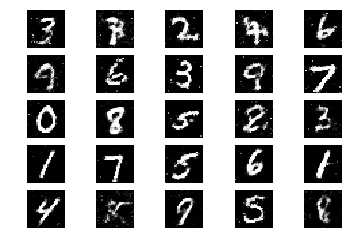

In [4]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.latent_dim)) #create a noise vector

gen_imgs = gan.generator.predict(noise) #input the noise vector

gen_imgs = 0.5 * gen_imgs + 0.5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1

In [ ]:
#now make a gif...
import imageio as io
import os

file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))
#making animation
with io.get_writer('ganOut.gif', mode='I', duration=0.5) as writer:
    for filename in file_names:
        image = io.imread(filename)
        writer.append_data(image)
writer.close()

In [6]:
#Now try to  load your data file
#2 approaches.



AttributeError: 'Model' object has no attribute 'new1'

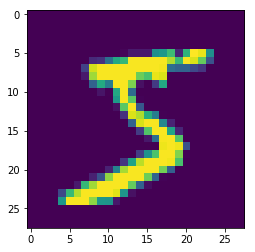

In [21]:
(X_train, new1), (new2, new3) = mnist.load_data() #check what percentage is loaded into the news
plt.imshow(X_train[0])

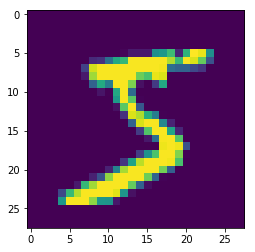

In [22]:
 X_train = X_train / 127.5 - 1.
plt.imshow(X_train[0])

In [24]:
valid = np.ones((132, 1))
fake = np.zeros((132, 1))

In [30]:
len(valid[0])

1

Pickle File openned and loaded


C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


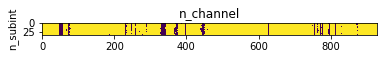

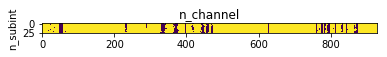

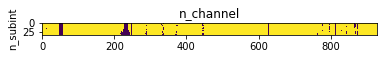

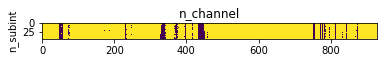

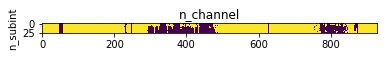

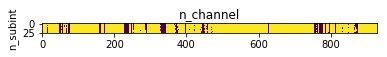

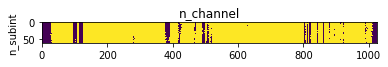

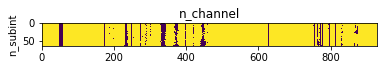

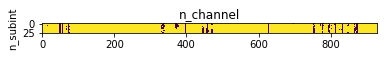

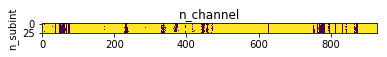

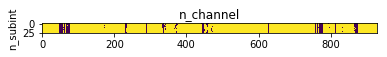

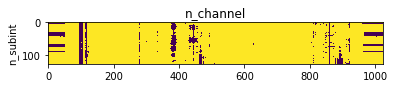

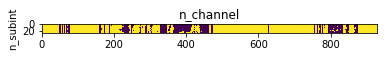

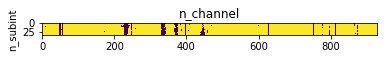

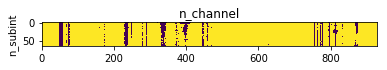

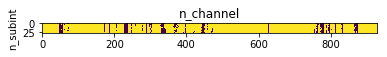

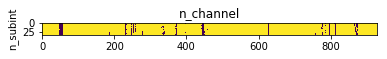

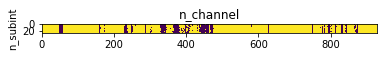

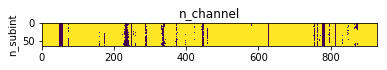

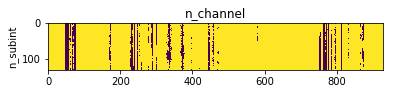

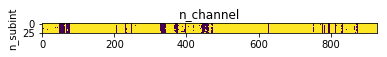

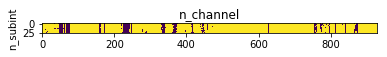

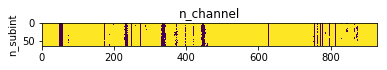

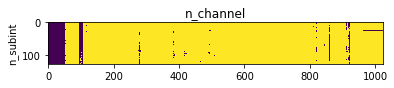

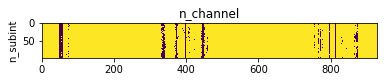

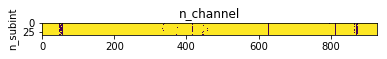

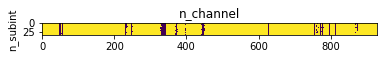

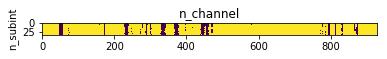

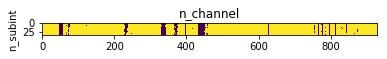

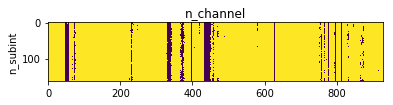

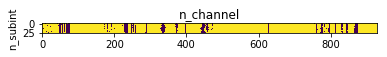

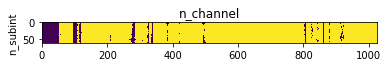

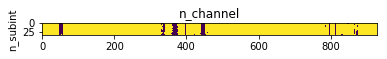

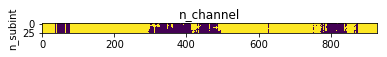

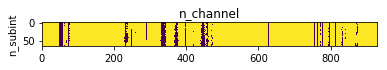

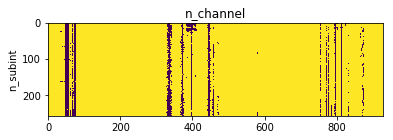

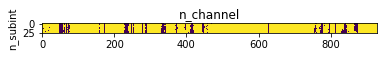

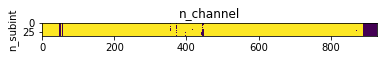

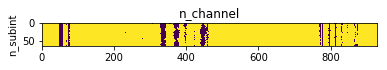

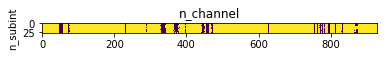

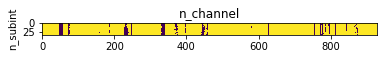

In [3]:
import pickle
with open('label_weight.pickle', 'rb') as fid:
    a = pickle.load(fid, encoding='latin1')
    print("Pickle File openned and loaded")
    
    
indexK = 0
plot_Name = 'weightMatrix'

for k, v in a.items():
    #y axis n subint
    fig = plt.figure()
    fig.subplots_adjust(top=1.0)
    ax1 = fig.add_subplot(211)
    ax1.set_ylabel('n_subint')
    ax1.set_title('n_channel')
    plt.imshow(v)
    #plt.savefig(plot_Name+str(indexK)+".png")
    indexK += 1


In [4]:
X_data = []
from scipy.misc import imresize

for k, v in a.items():
    print(len(v))
    #print(len(v))
    #plt.imshow(v)
    X_data.append (v)
    #y axis n subint
    #fig = plt.figure()
    #fig.subplots_adjust(top=1.0)
    #ax1 = fig.add_subplot(211)
    #ax1.set_ylabel('n_subint')
    #ax1.set_title('n_channel')
    #plt.imshow(v)
    #plt.savefig(plot_Name+str(indexK)+".png")
    #indexK += 1

33
26
33
44
26
26
63
64
26
26
26
127
25
34
65
27
33
25
63
130
26
26
64
127
97
33
34
33
34
162
26
63
34
26
65
257
26
35
64
27
33


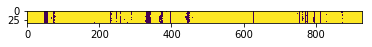

In [5]:
plt.imshow(X_data[0])

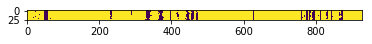

In [6]:
plt.imshow(X_data[1])

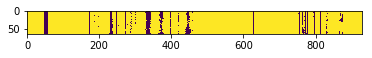

In [7]:
plt.imshow(X_data[7])

In [8]:
from scipy.misc import imresize
newimg = imresize(X_data[1], (257,1024))

C:\Users\afiqAUT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Scaled Weight Matrix


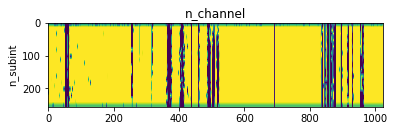

In [11]:
print("Scaled Weight Matrix")

#y axis n subint
fig = plt.figure()
fig.subplots_adjust(top=1.0)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('n_subint')
ax1.set_title('n_channel')
plt.imshow(newimg)
#plt.savefig(plot_Name+str(indexK)+".png")
indexK += 1